In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
train=pd.read_csv(r'data/train.csv')
test=pd.read_csv(r'data/test_QoiMO9B.csv')
center_info=pd.read_csv(r'data/fulfilment_center_info.csv')
meal_info=pd.read_csv(r'data/meal_info.csv')
train_merged=pd.merge(train,meal_info,on='meal_id')
train_merged=pd.merge(train_merged,center_info,on='center_id')
print(train_merged.head(),train_merged.shape)

test_merged=pd.merge(test,meal_info,on='meal_id')
test_merged=pd.merge(test_merged,center_info,on='center_id')
test_merged.head(),test_merged.shape

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1018704     2         55     1885          135.83      152.29   
2  1196273     3         55     1885          132.92      133.92   
3  1116527     4         55     1885          135.86      134.86   
4  1343872     5         55     1885          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders   category cuisine  \
0                      0                  0         177  Beverages    Thai   
1                      0                  0         323  Beverages    Thai   
2                      0                  0          96  Beverages    Thai   
3                      0                  0         163  Beverages    Thai   
4                      0                  0         215  Beverages    Thai   

   city_code  region_code center_type  op_area  
0        647           56      TYPE_C      2.0  
1        647           5

(        id  week  center_id  meal_id  checkout_price  base_price  \
 0  1028232   146         55     1885          158.11      159.11   
 1  1262649   147         55     1885          159.11      159.11   
 2  1453211   149         55     1885          157.14      158.14   
 3  1262599   150         55     1885          159.14      157.14   
 4  1495848   151         55     1885          160.11      159.11   
 
    emailer_for_promotion  homepage_featured   category cuisine  city_code  \
 0                      0                  0  Beverages    Thai        647   
 1                      0                  0  Beverages    Thai        647   
 2                      0                  0  Beverages    Thai        647   
 3                      0                  0  Beverages    Thai        647   
 4                      0                  0  Beverages    Thai        647   
 
    region_code center_type  op_area  
 0           56      TYPE_C      2.0  
 1           56      TYPE_C      2.0

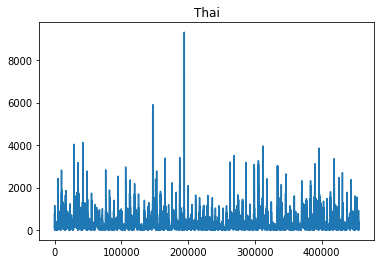

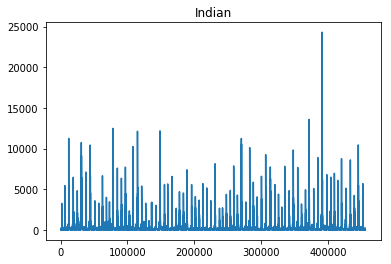

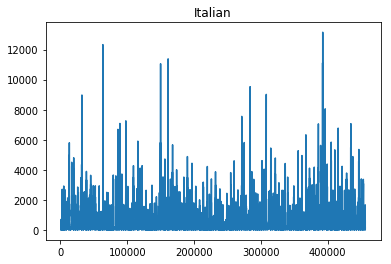

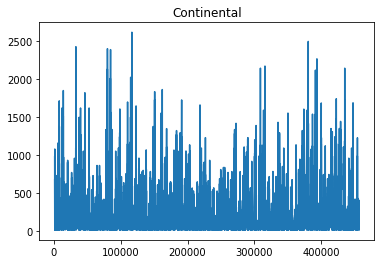

In [7]:
for col in train_merged['cuisine'].unique():
    train_merged[train_merged['cuisine']==col]['num_orders'].plot()
    plt.title(col)
    plt.show()

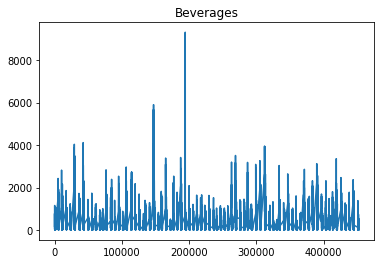

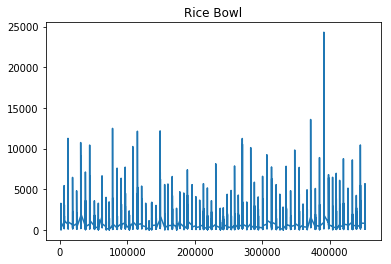

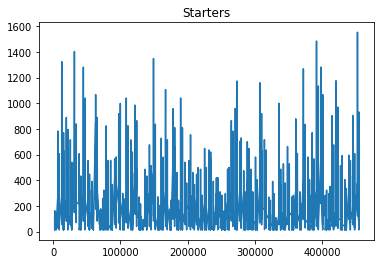

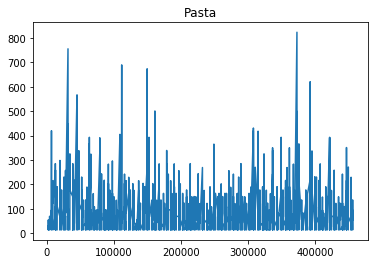

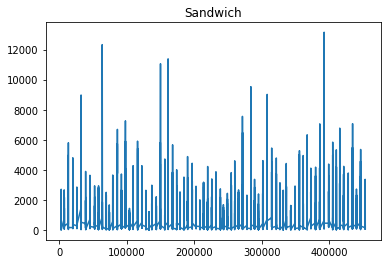

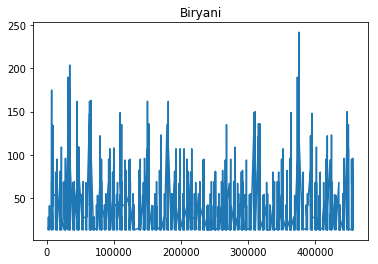

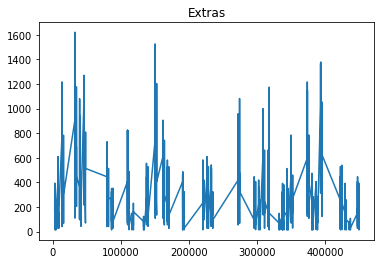

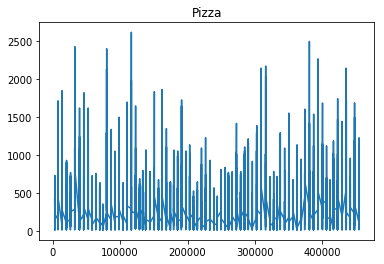

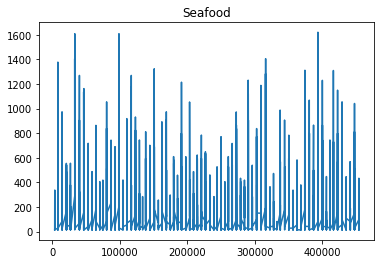

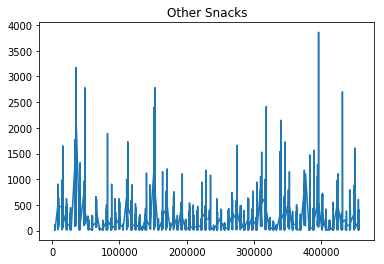

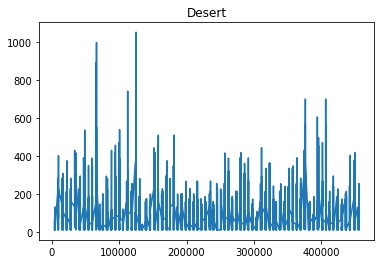

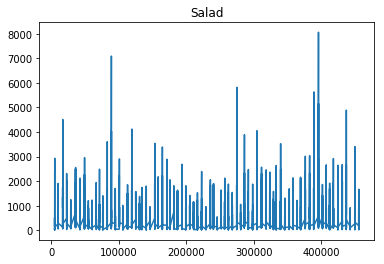

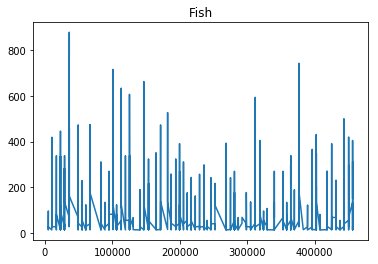

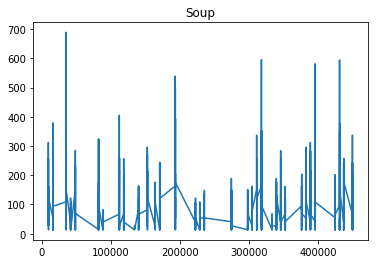

In [8]:
for col in train_merged['category'].unique():
    train_merged[train_merged['category']==col]['num_orders'].plot()
    plt.title(col)
    plt.show()

In [13]:
pd.pivot_table(train_merged,values='num_orders',index=['cuisine','category'],columns='region_code',aggfunc=np.sum)

region_code                     23         34        35          56        71  \
cuisine     category                                                            
Continental Beverages      95228.0  1412293.0   58722.0   2389895.0  136991.0   
            Fish           12290.0   219415.0    6414.0    423389.0   11112.0   
            Pizza         101265.0  1691075.0   67452.0   3388938.0  142108.0   
            Seafood        34582.0   540447.0   16022.0   1399959.0   49603.0   
Indian      Beverages      25579.0   579329.0   19123.0   1066857.0   31231.0   
            Biryani         4243.0   144619.0    3256.0    304389.0    7476.0   
            Desert         19705.0   560059.0   10234.0    821635.0   22187.0   
            Rice Bowl     290422.0  4461887.0  117132.0  10124605.0  377526.0   
Italian     Beverages     257101.0  2013560.0   79964.0   7722006.0  347183.0   
            Pasta          13823.0   392948.0    8734.0    795142.0   18347.0   
            Salad         128456.0  2660803.0   79897.0   4776891.0  161377.0   
            Sandwich      241290.0  4433720.0  100351.0   7998119.0  293825.0   
Thai        Beverages     221146.0  2842135.0   80433.0  10303181.0  360518.0   
            Extras         43629.0        NaN       NaN   3714613.0    7964.0   
            Other Snacks   48207.0   848819.0    7375.0   2656234.0   71639.0   
            Soup           42662.0        NaN       NaN    727295.0   23925.0   
            Starters       30278.0  1250624.0   35935.0   1907043.0   40270.0   

region_code                      77         85        93  
cuisine     category                                      
Continental Beverages     1344121.0   424180.0   81616.0  
            Fish           139499.0    39934.0   19906.0  
            Pizza         1257847.0   641047.0   93988.0  
            Seafood        479997.0   167120.0   27984.0  
Indian      Beverages      459839.0   134955.0   28966.0  
            Biryani        122983.0    39118.0    5764.0  
            Desert         353887.0   134432.0   18615.0  
            Rice Bowl     3808710.0  1476481.0  217300.0  
Italian     Beverages     2225295.0  1197801.0  111060.0  
            Pasta          299734.0    86968.0   22048.0  
            Salad         2277397.0   767214.0   92301.0  
            Sandwich      3115344.0  1240677.0  213456.0  
Thai        Beverages     2716891.0  1345307.0  368019.0  
            Extras              NaN   218773.0       NaN  
            Other Snacks   814175.0   296604.0   23240.0  
            Soup                NaN   245764.0       NaN  
            Starters      1113934.0   229011.0   42027.0

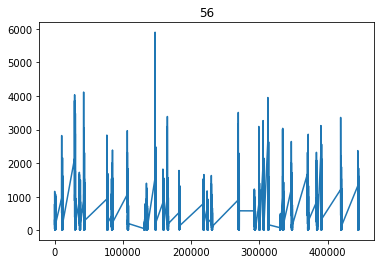

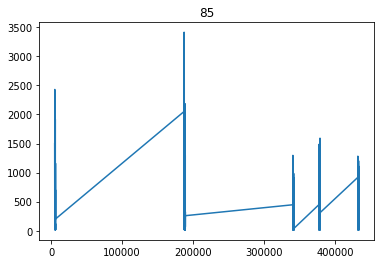

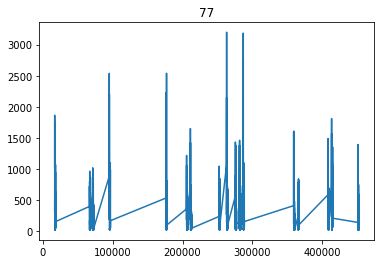

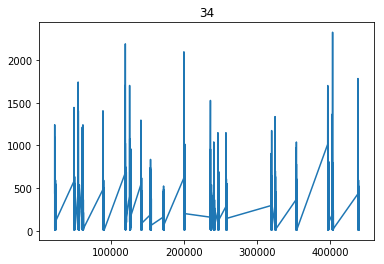

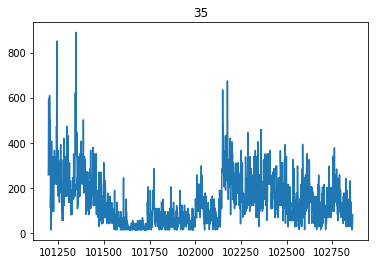

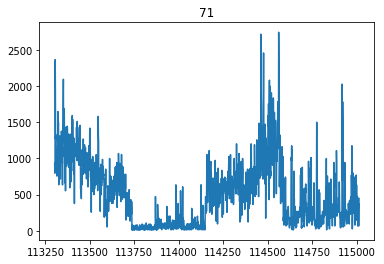

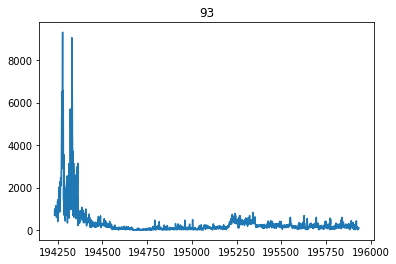

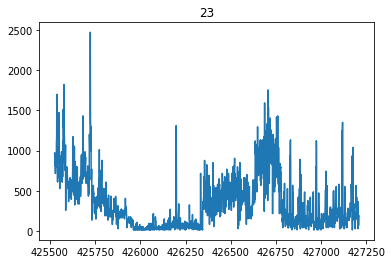

In [21]:
grouped=train_merged.groupby('region_code')
for reg in train_merged['region_code'].unique():
    tmp=grouped.get_group(reg)
    tmp[tmp['category']=='Beverages']['num_orders'].plot()
    plt.title(reg)
    plt.show()

In [41]:
grouped=train_merged.groupby('region_code')
def plot_for_category(name):
    for reg in train_merged['region_code'].unique():
        tmp=grouped.get_group(reg)
        tmp=tmp[tmp['category']==name]
        plt.plot(tmp.week.sort_values(),tmp['num_orders'],label='orginal')
        plt.plot(tmp.week.sort_values(),tmp['num_orders'].rolling(2).mean(),label='moving average')
        plt.title(str(reg)+'-'+name)
        plt.legend()
        plt.show()

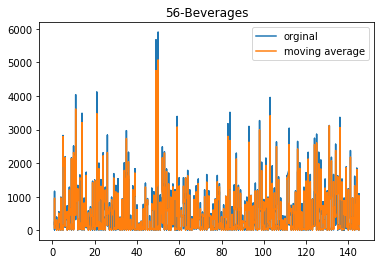

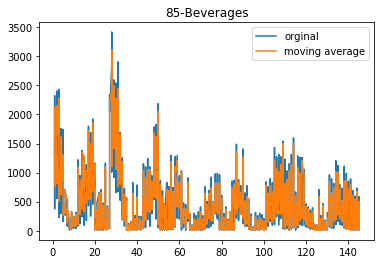

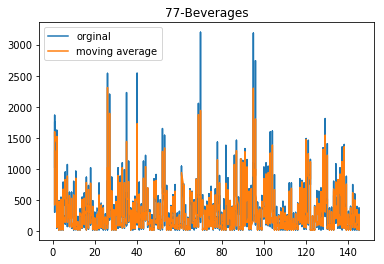

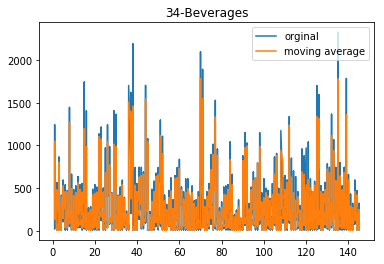

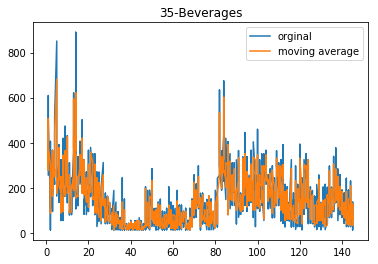

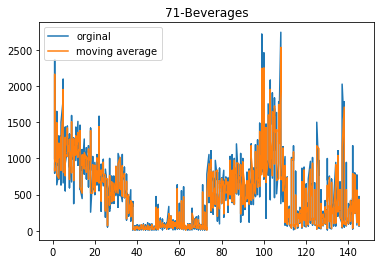

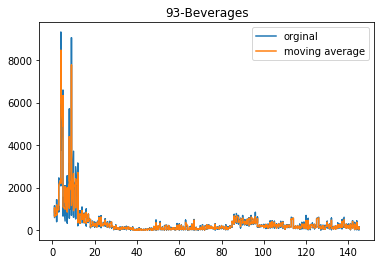

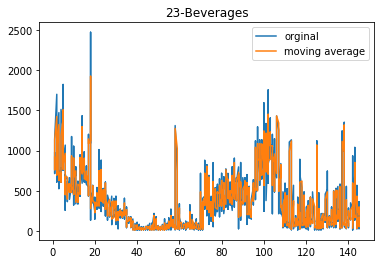

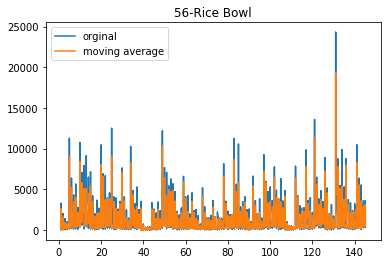

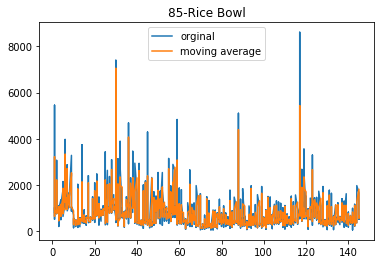

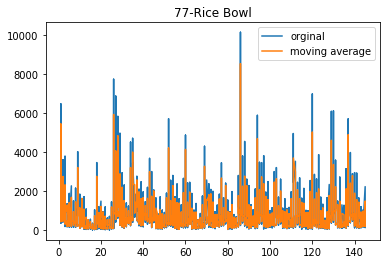

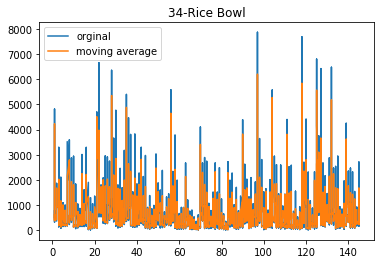

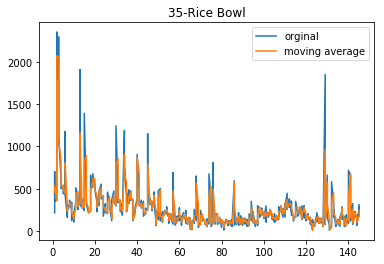

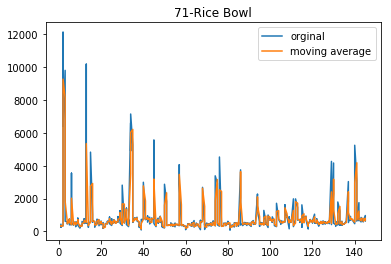

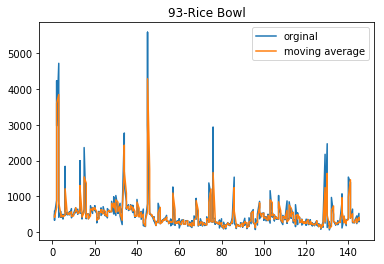

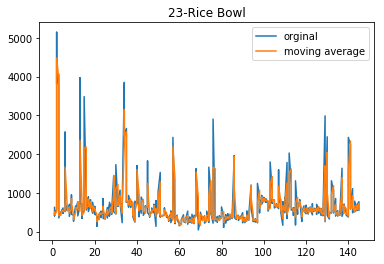

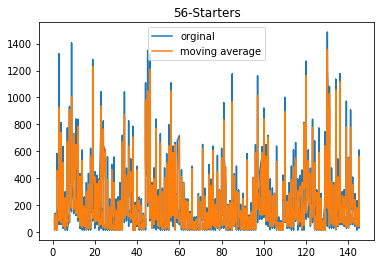

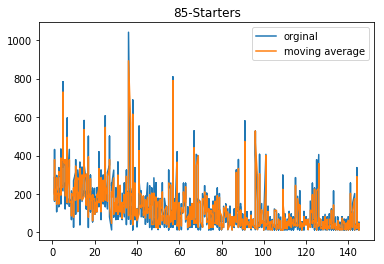

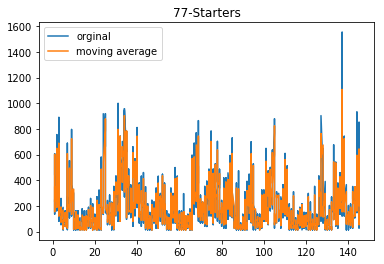

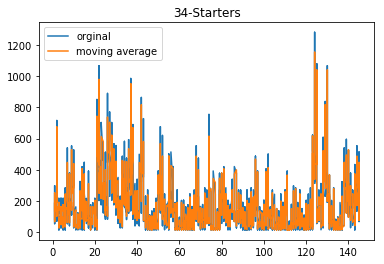

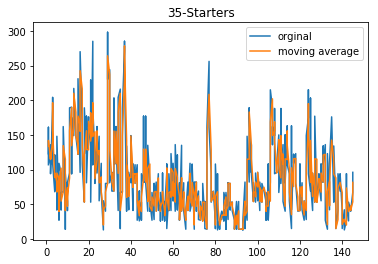

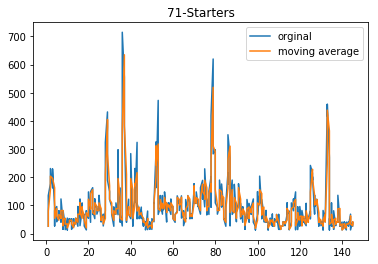

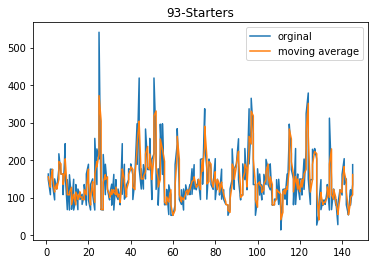

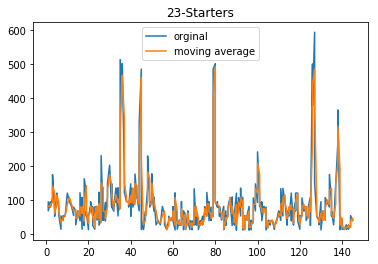

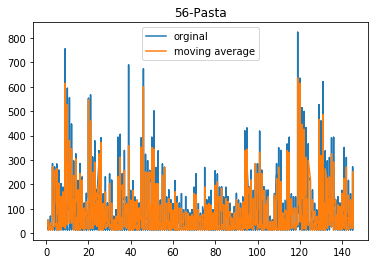

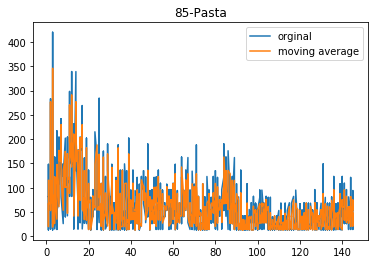

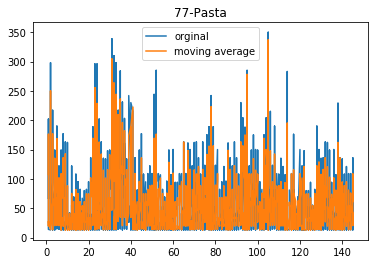

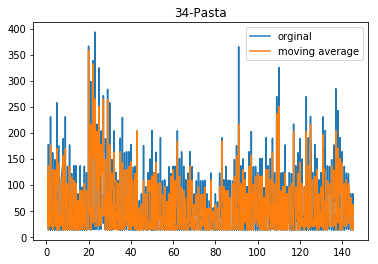

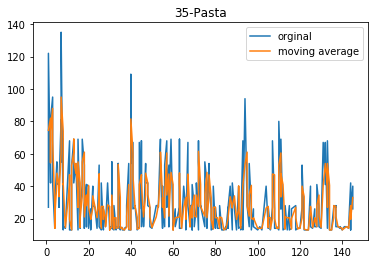

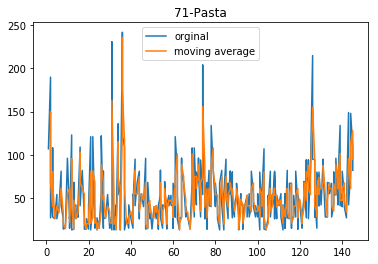

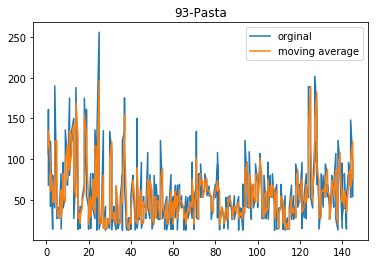

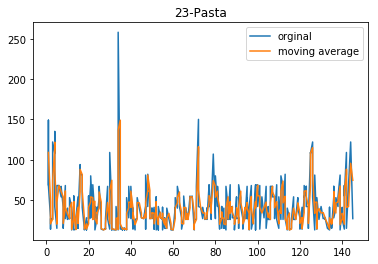

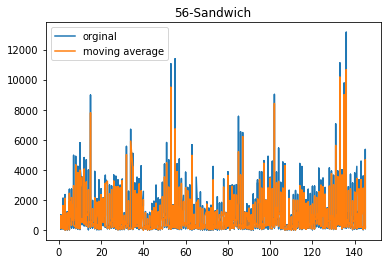

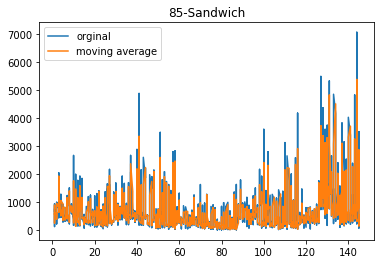

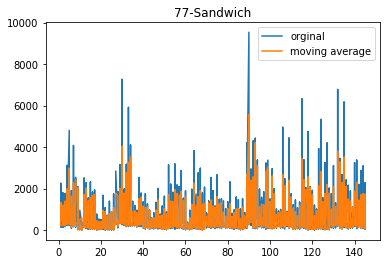

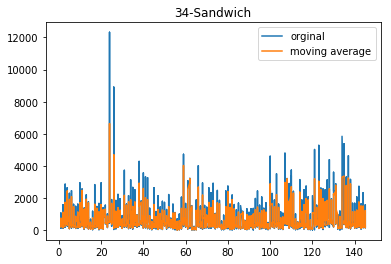

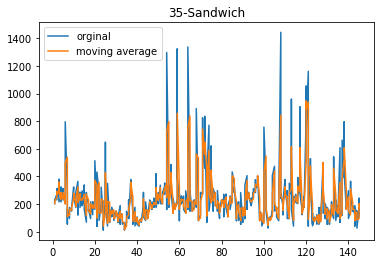

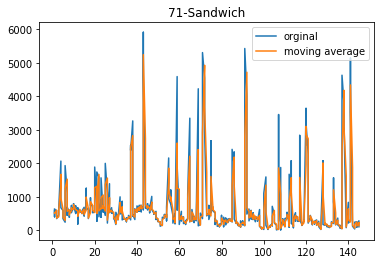

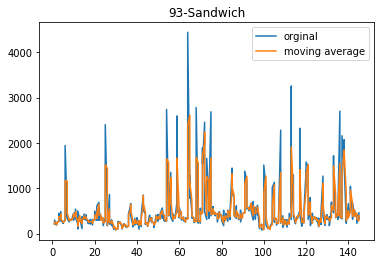

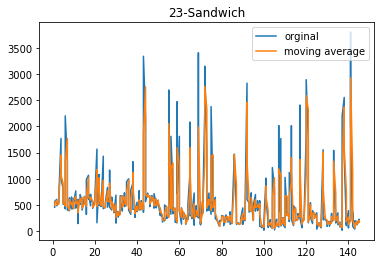

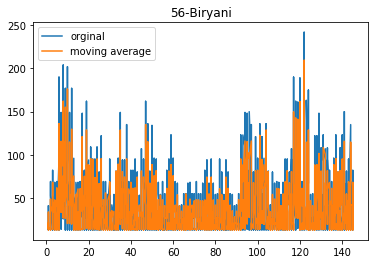

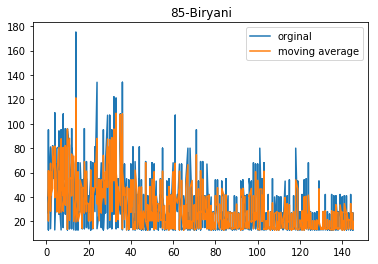

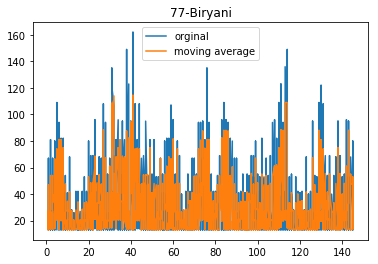

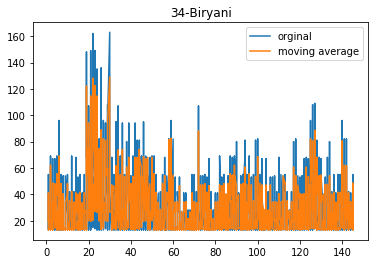

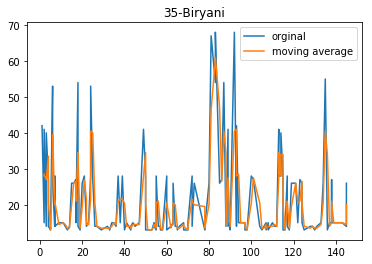

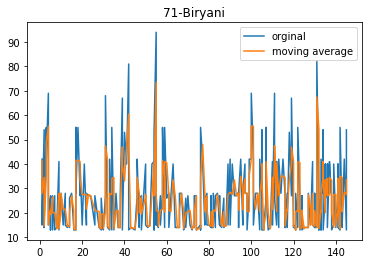

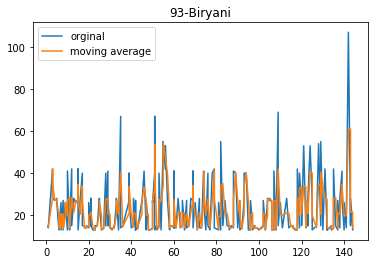

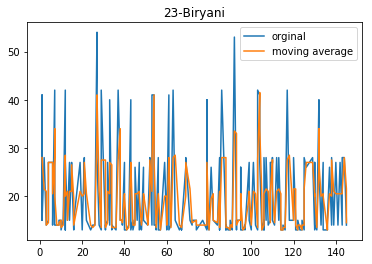

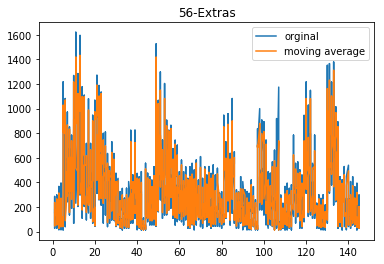

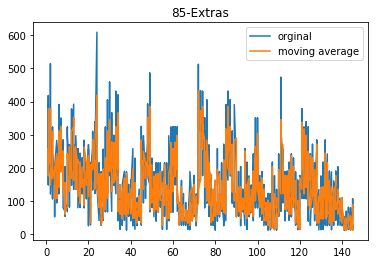

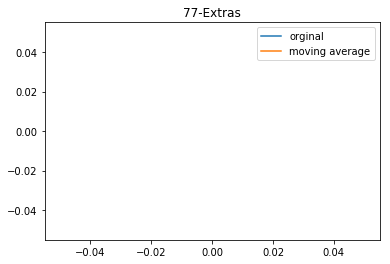

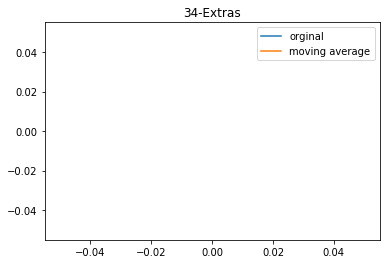

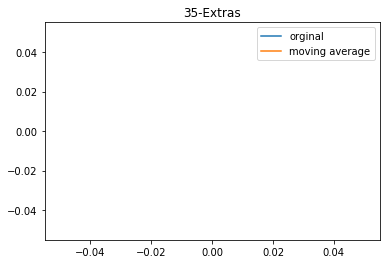

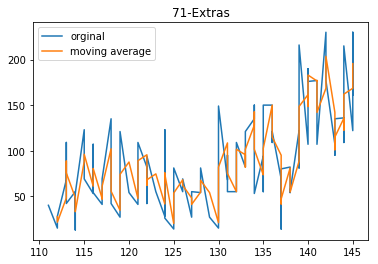

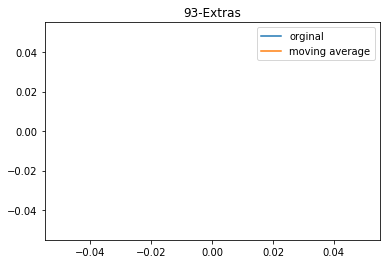

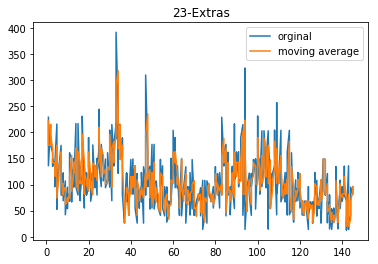

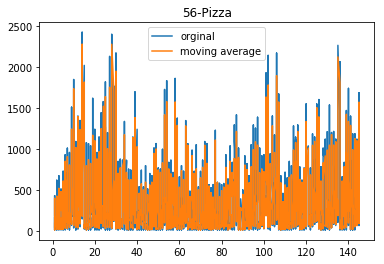

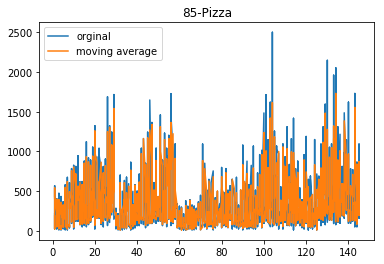

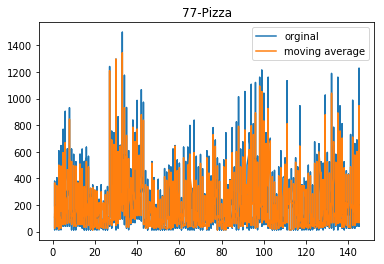

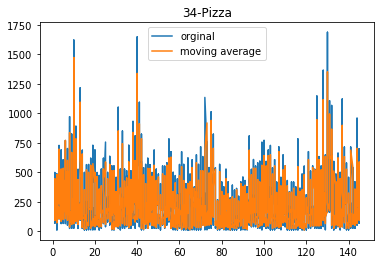

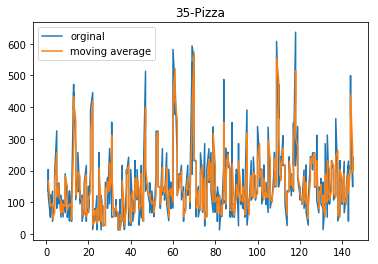

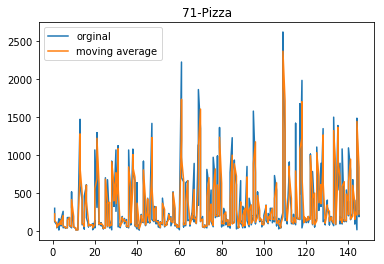

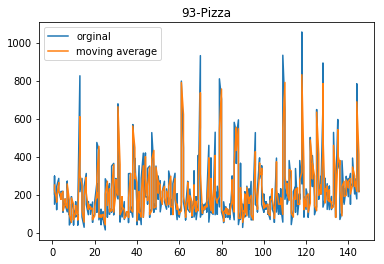

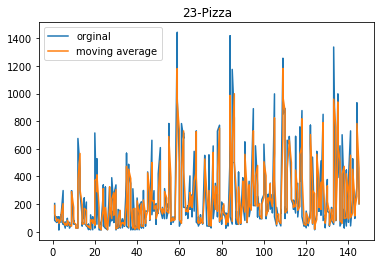

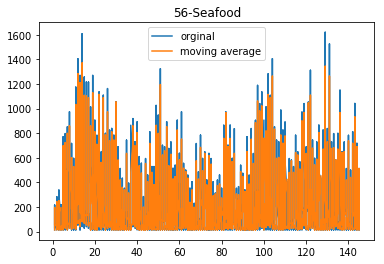

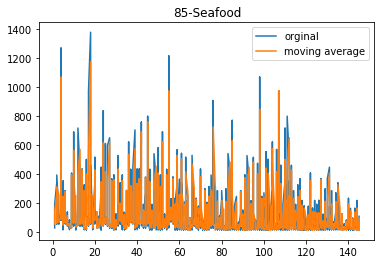

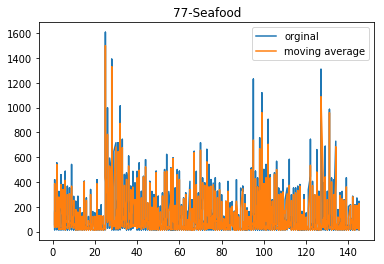

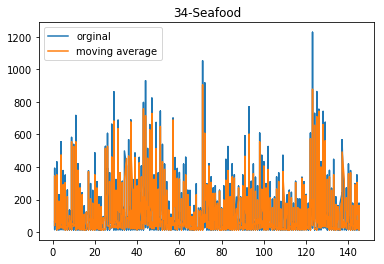

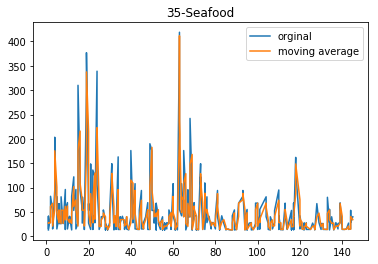

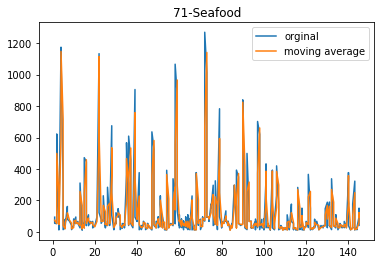

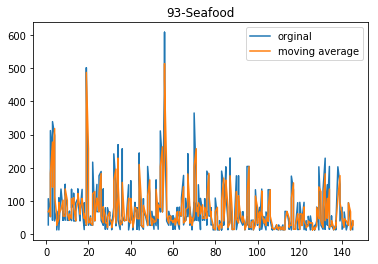

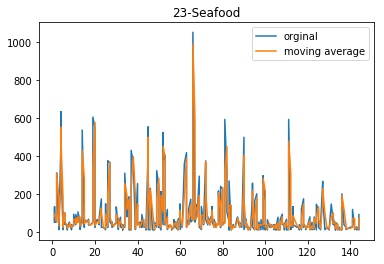

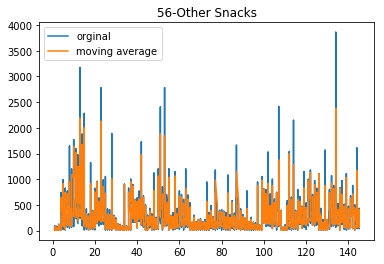

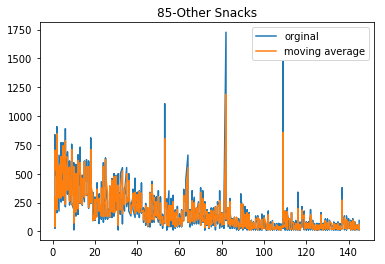

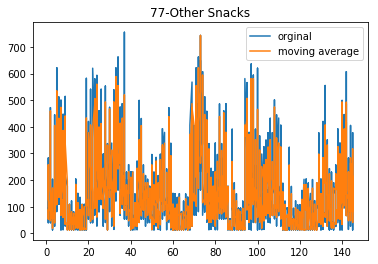

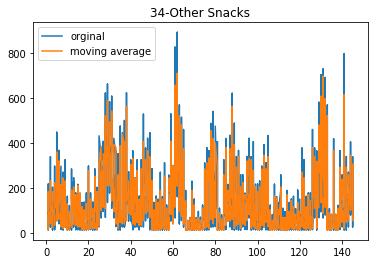

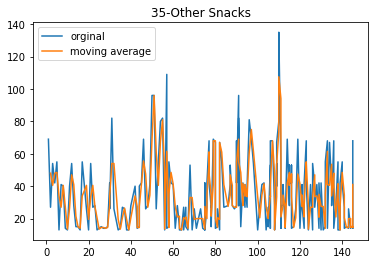

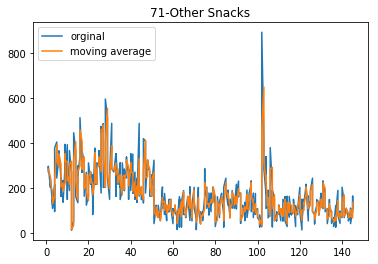

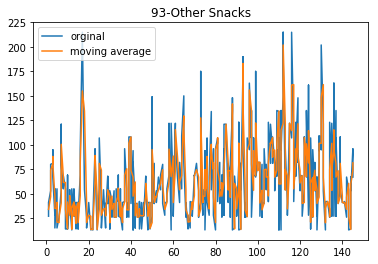

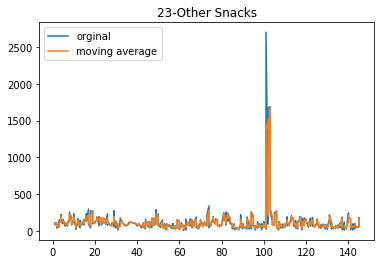

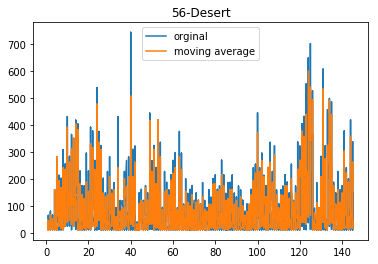

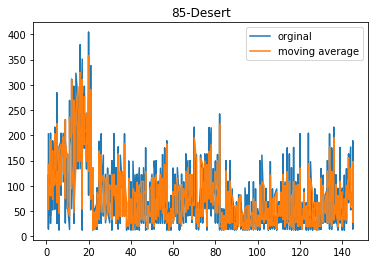

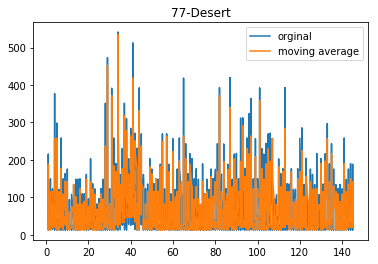

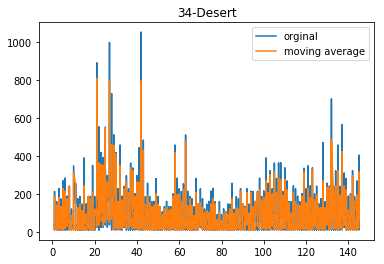

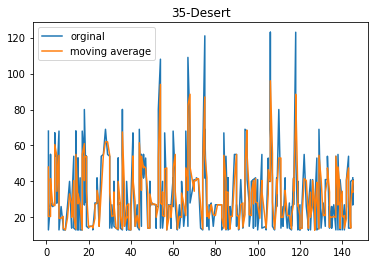

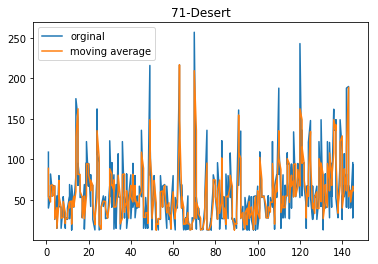

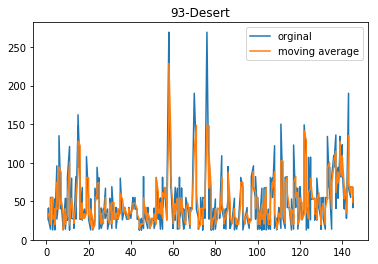

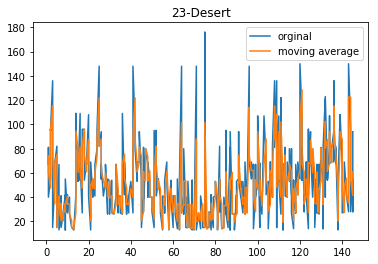

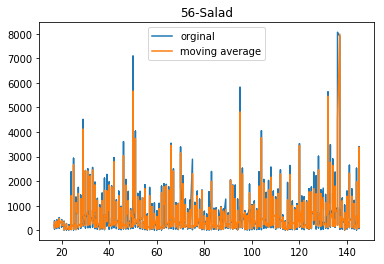

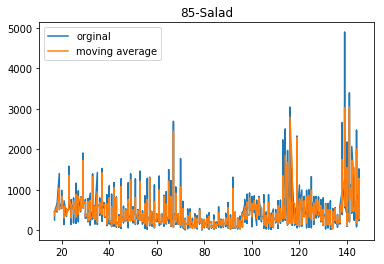

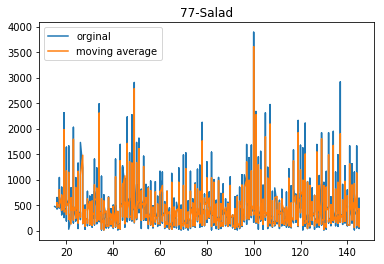

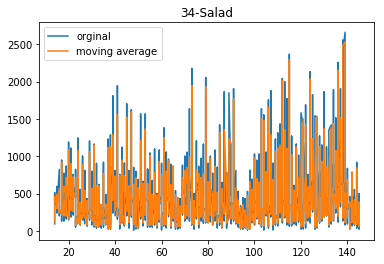

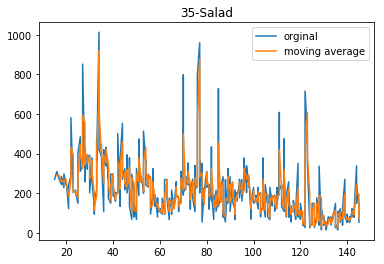

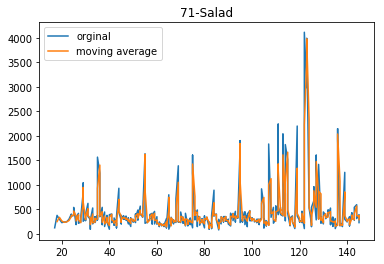

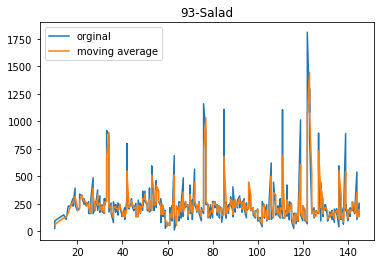

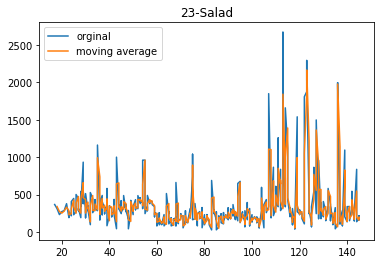

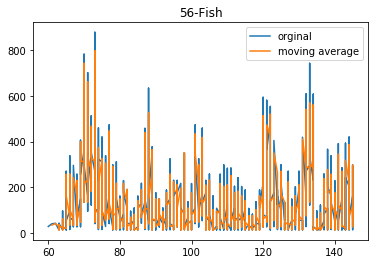

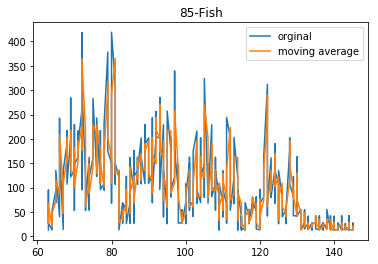

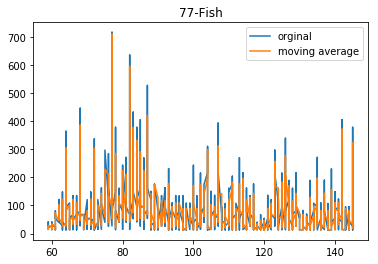

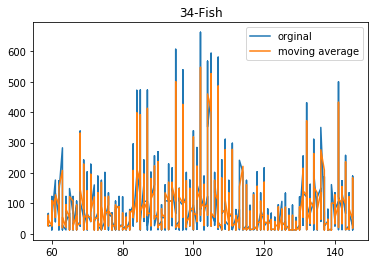

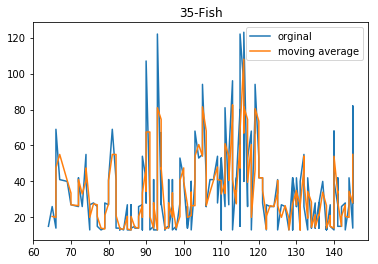

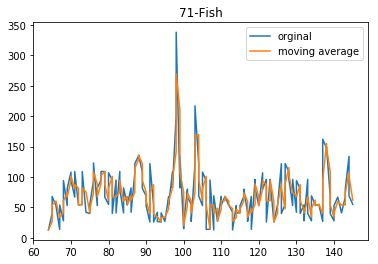

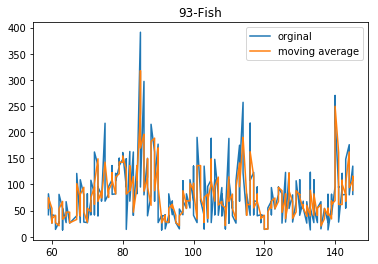

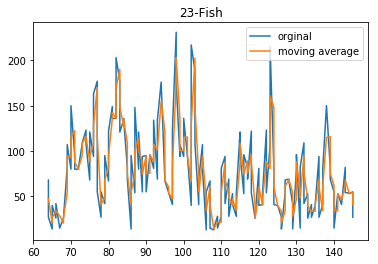

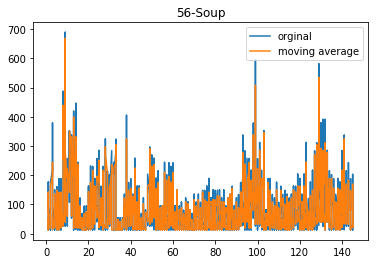

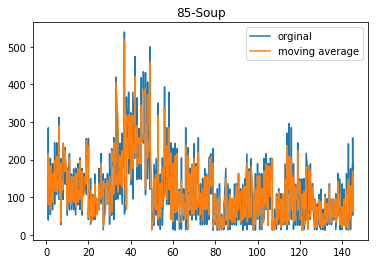

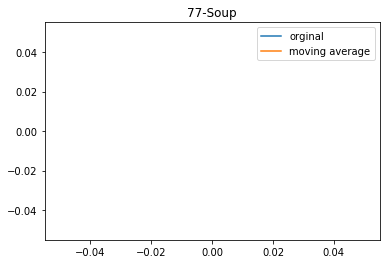

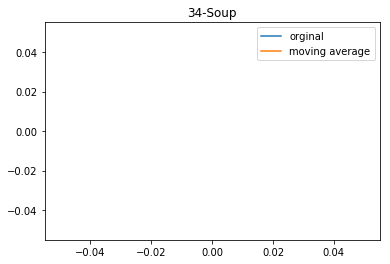

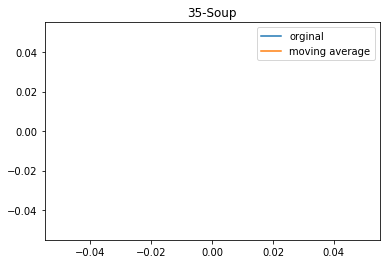

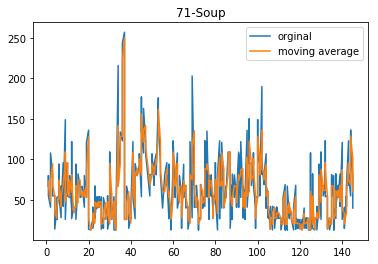

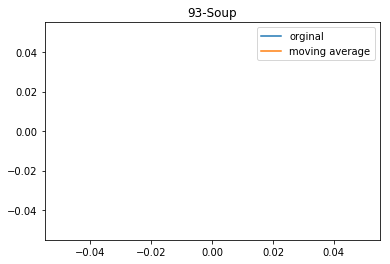

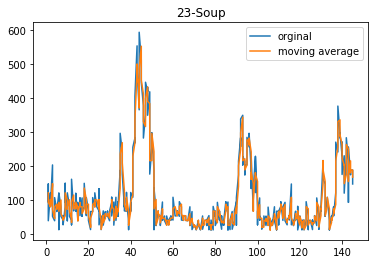

In [42]:
for v in train_merged['category'].unique():plot_for_category(v)

In [46]:
grouped=train_merged.groupby('region_code')
def plot_for_category_hist(name,xaxis):
    for reg in train_merged['region_code'].unique():
        tmp=grouped.get_group(reg)
        tmp=tmp[tmp['category']==name]
        tmp[xaxis].hist(bins=100)
        plt.xlabel(xaxis)
        plt.title(str(reg)+'-'+name)
        plt.show()

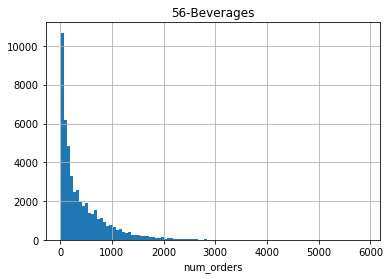

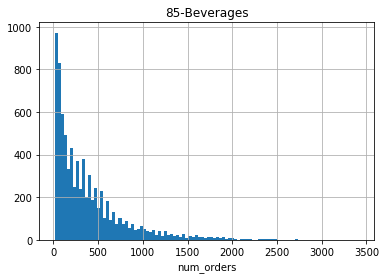

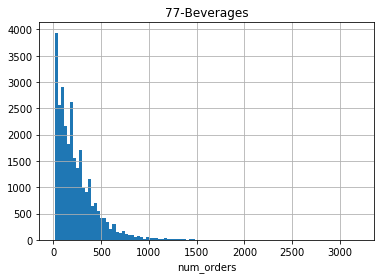

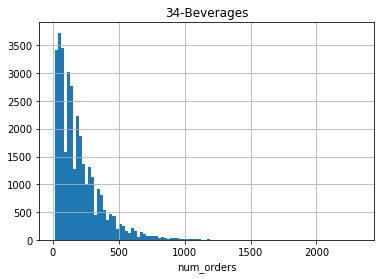

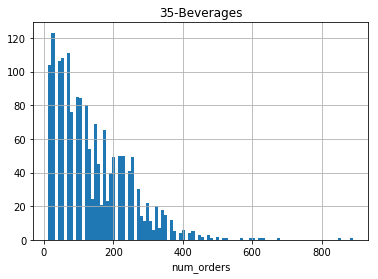

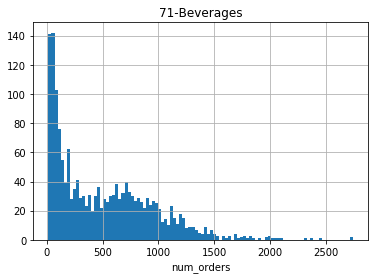

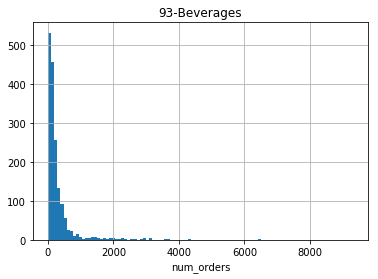

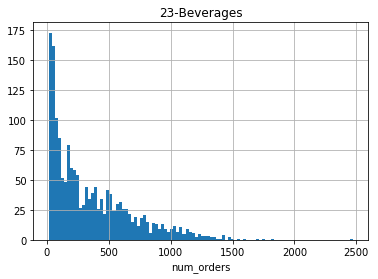

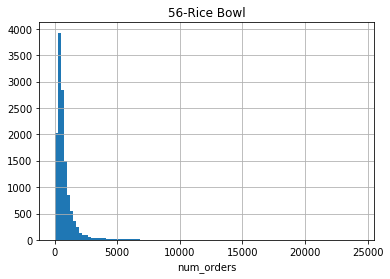

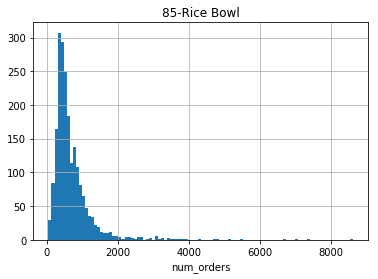

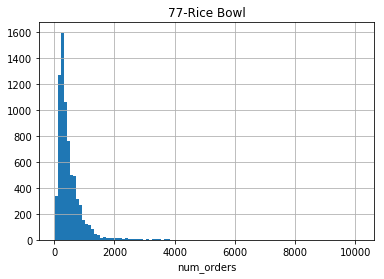

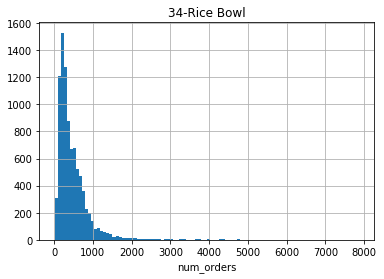

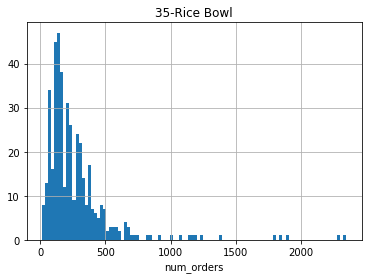

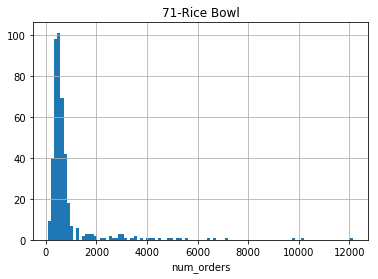

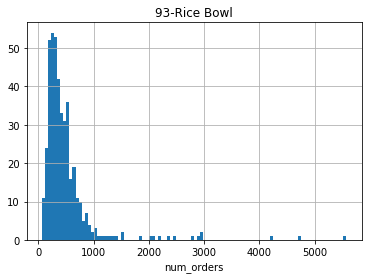

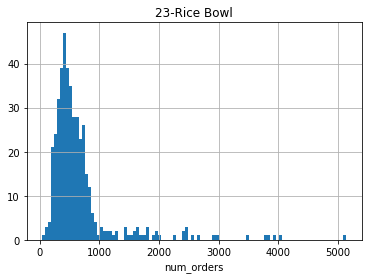

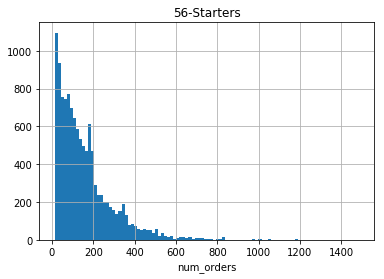

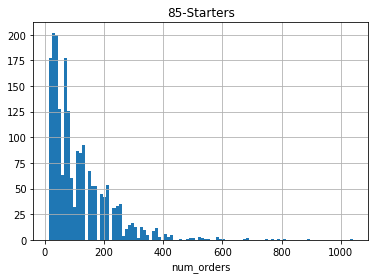

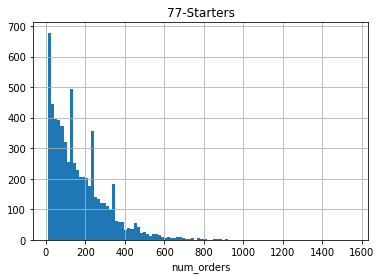

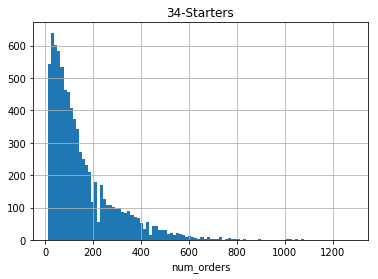

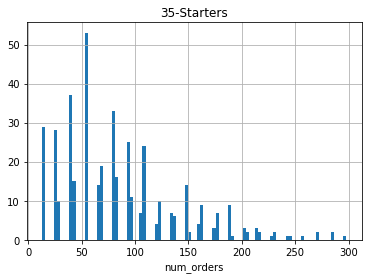

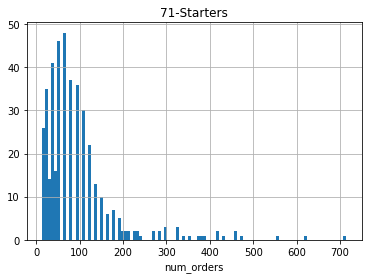

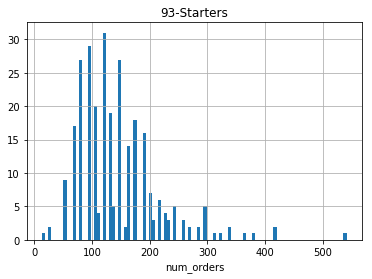

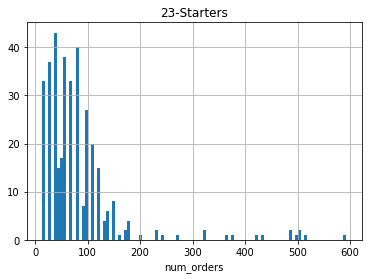

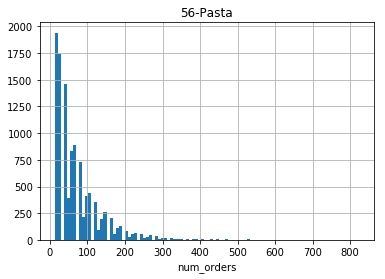

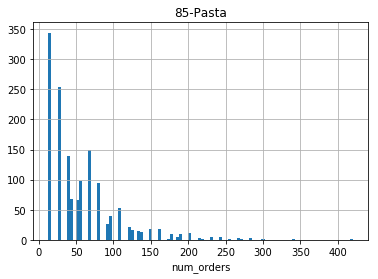

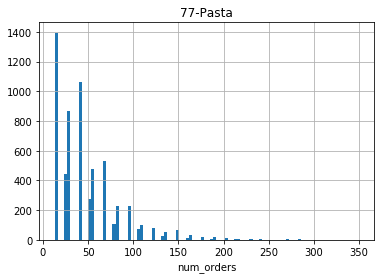

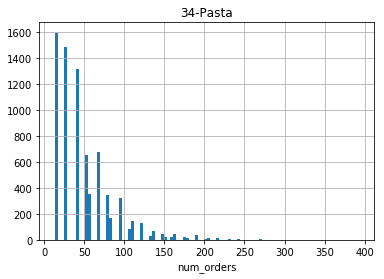

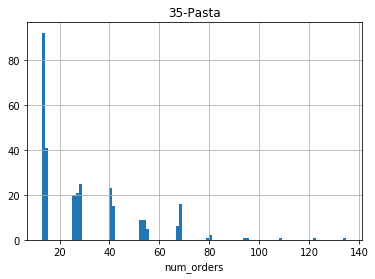

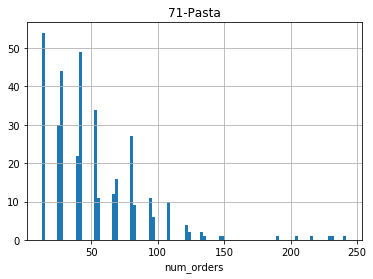

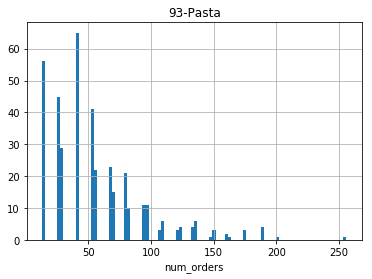

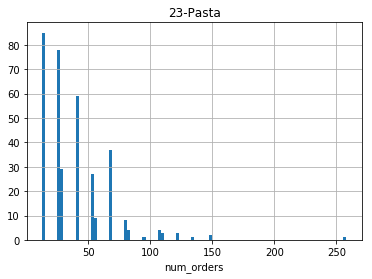

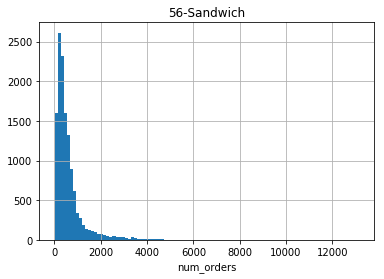

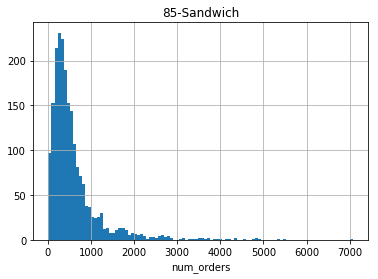

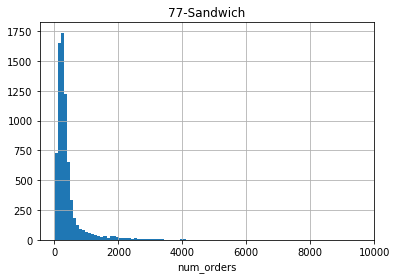

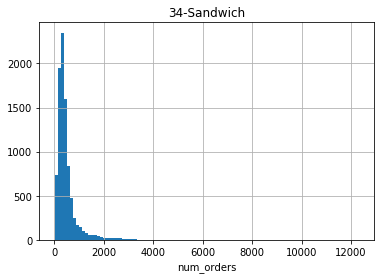

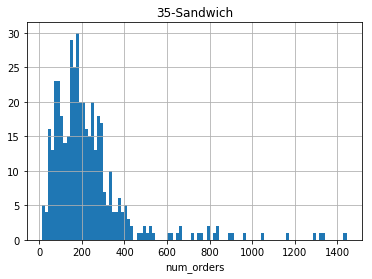

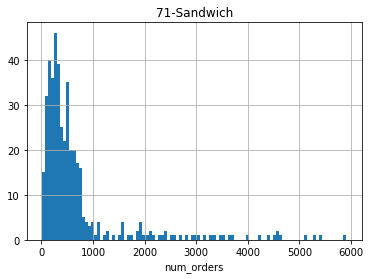

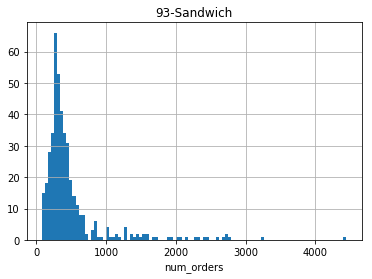

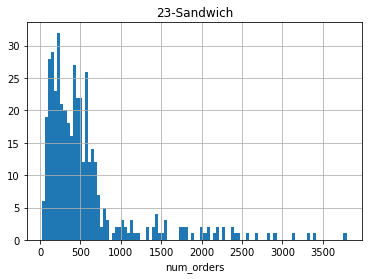

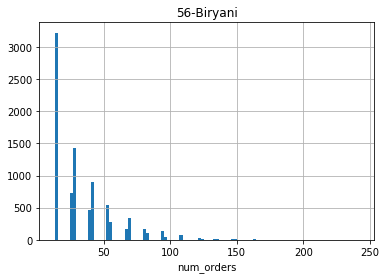

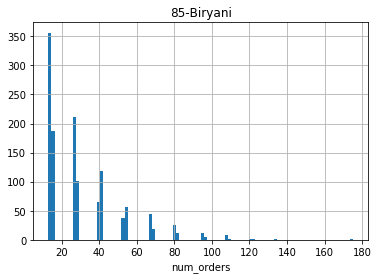

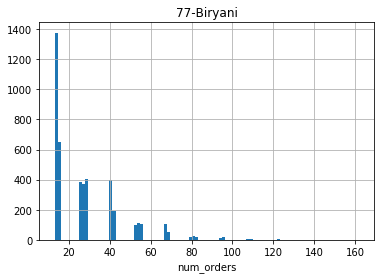

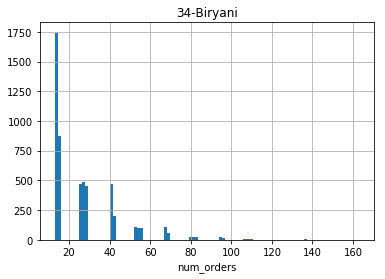

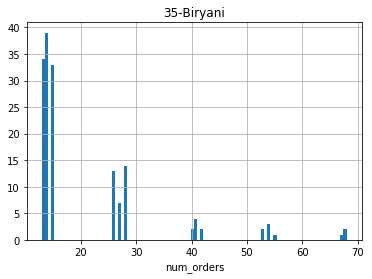

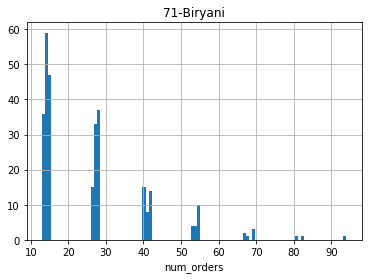

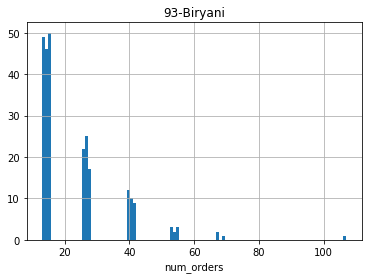

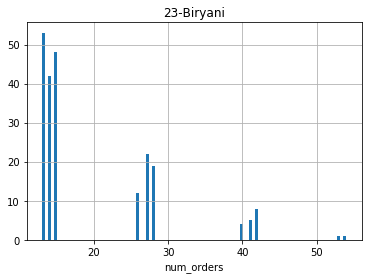

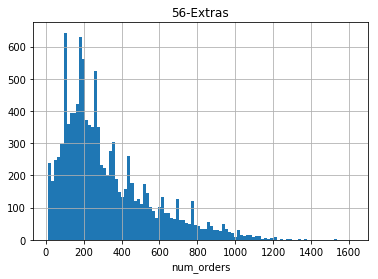

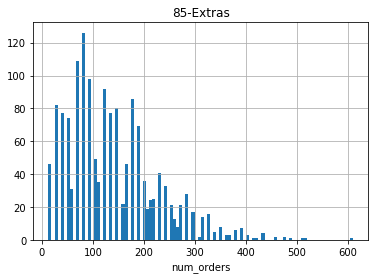

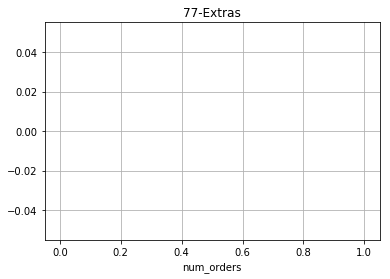

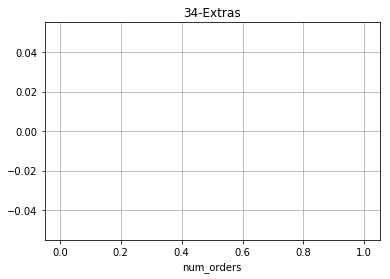

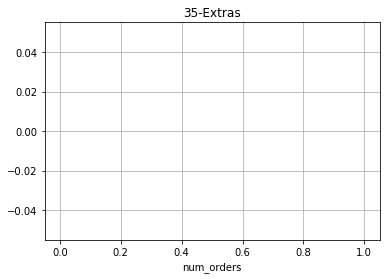

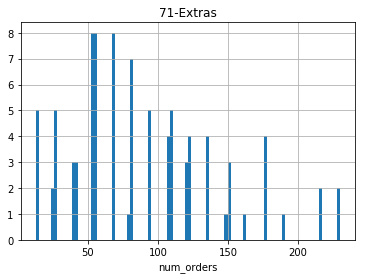

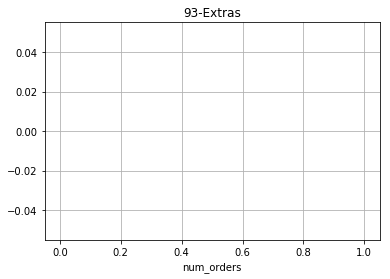

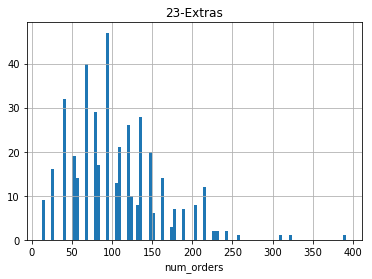

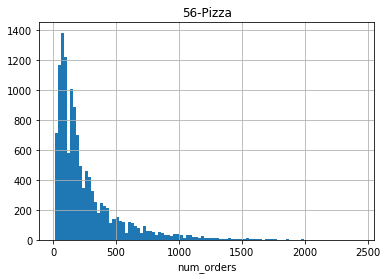

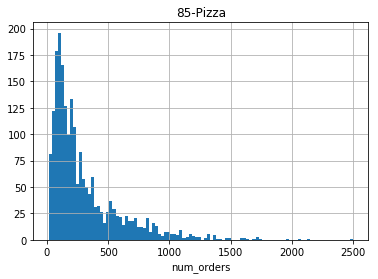

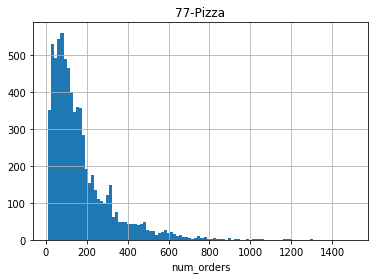

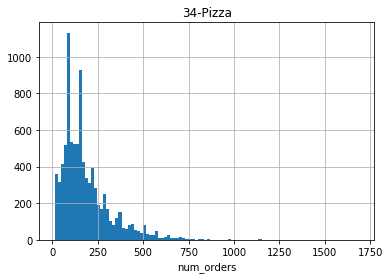

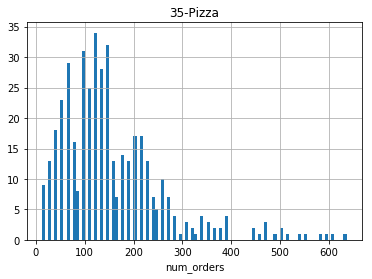

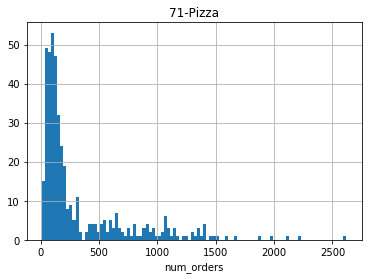

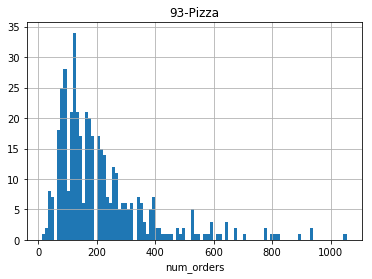

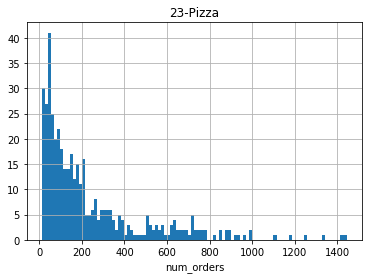

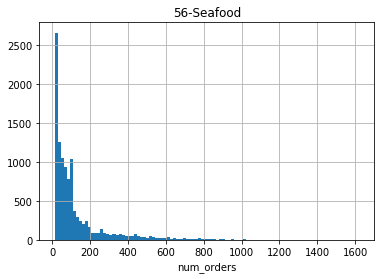

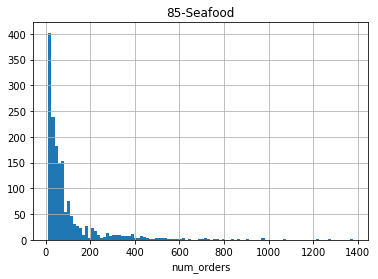

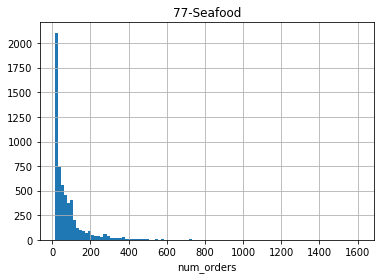

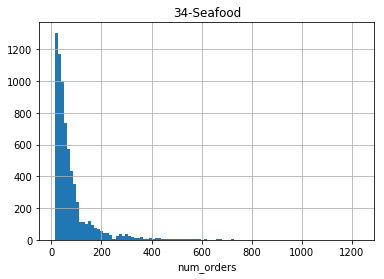

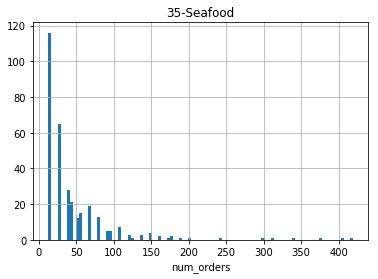

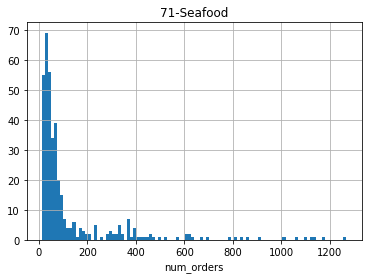

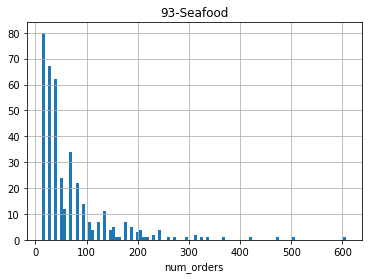

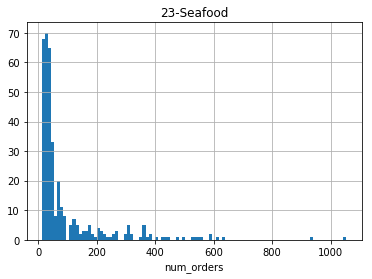

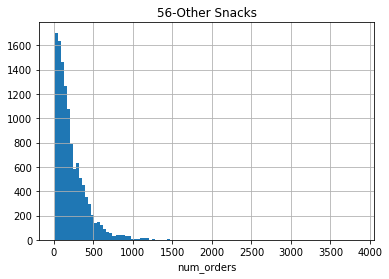

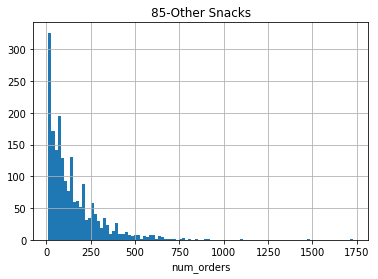

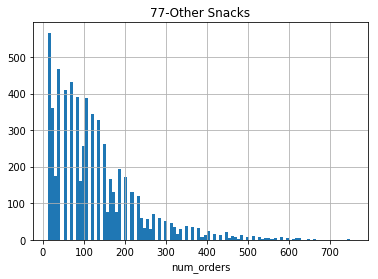

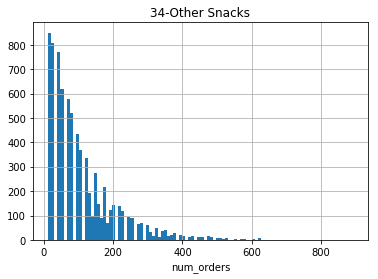

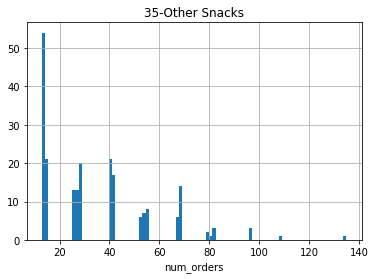

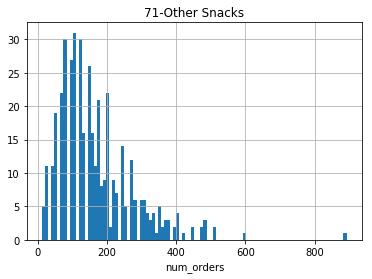

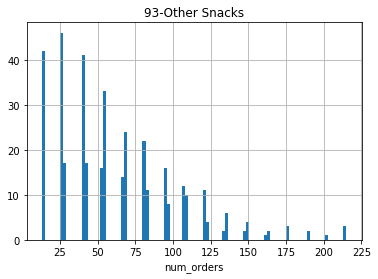

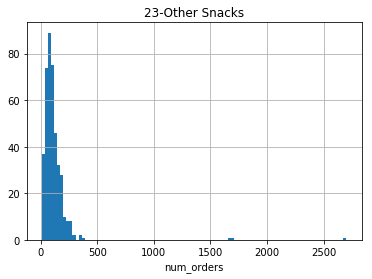

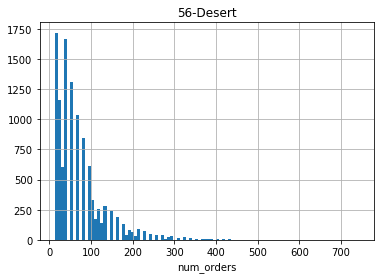

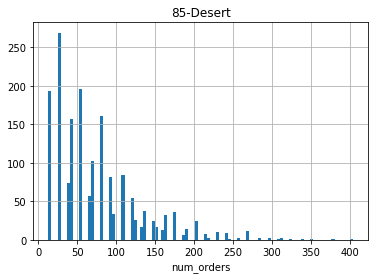

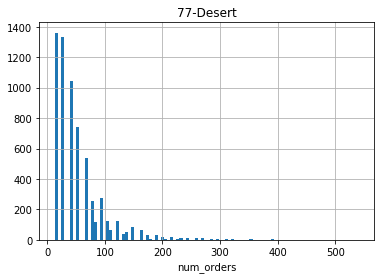

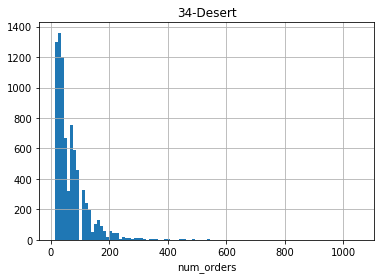

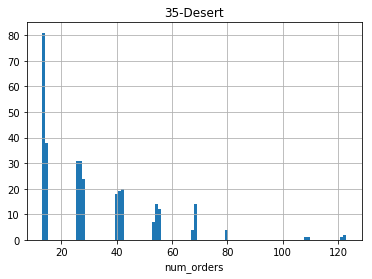

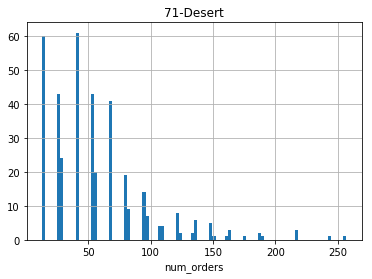

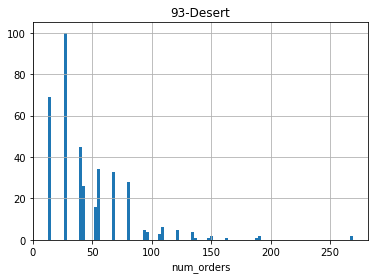

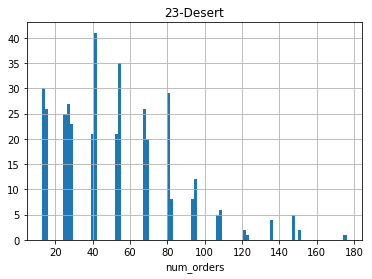

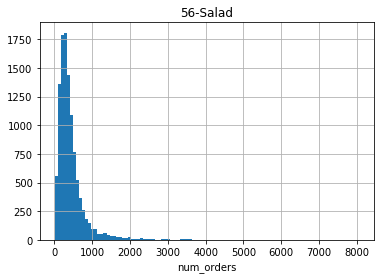

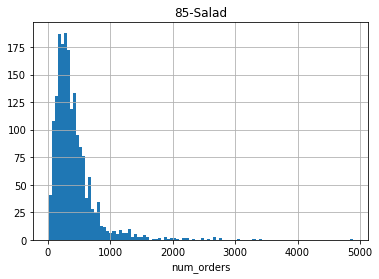

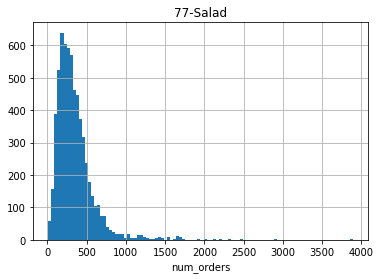

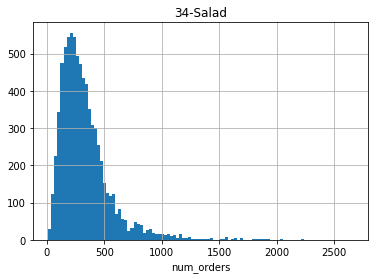

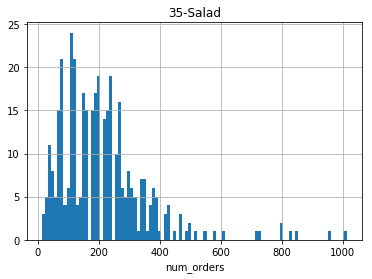

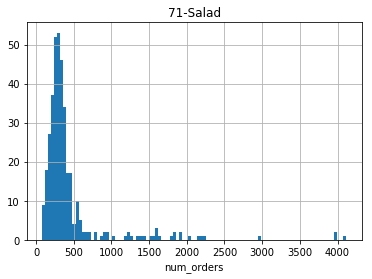

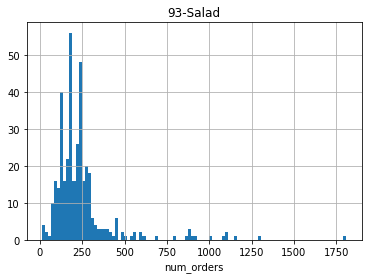

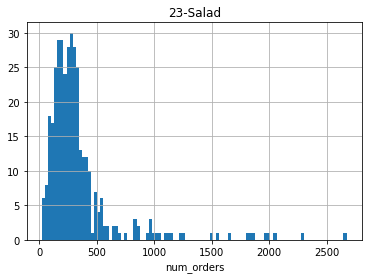

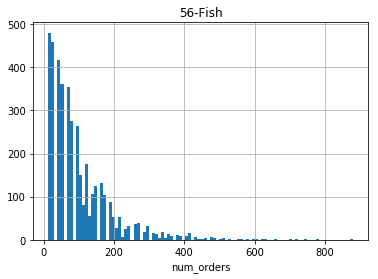

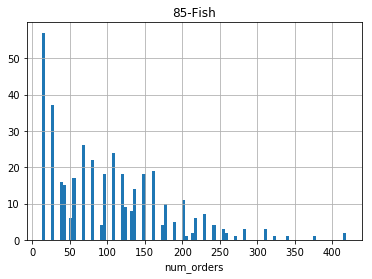

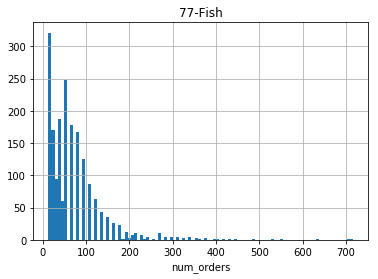

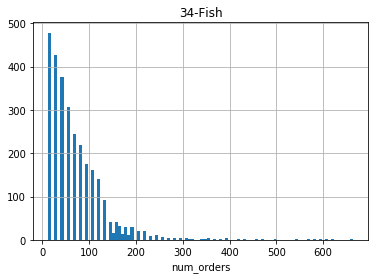

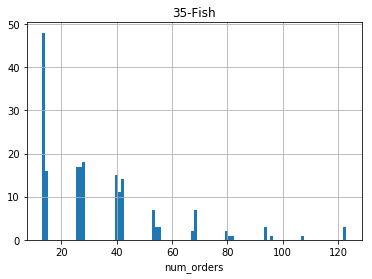

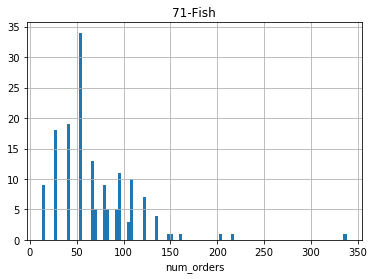

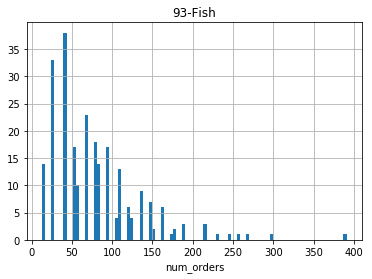

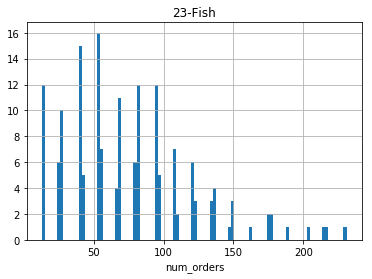

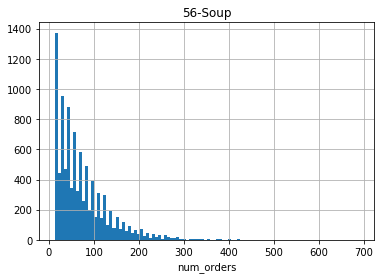

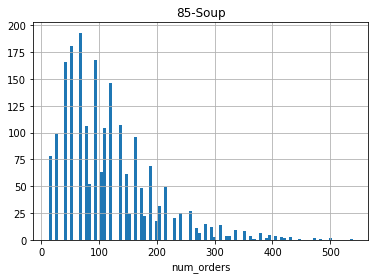

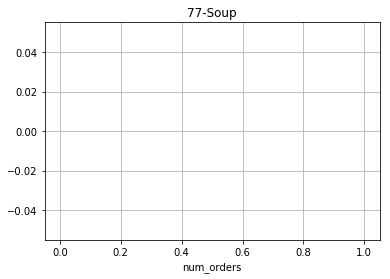

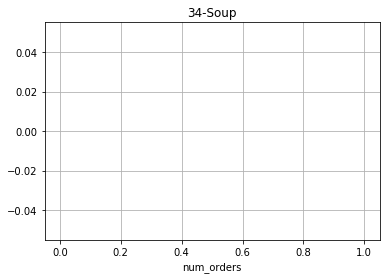

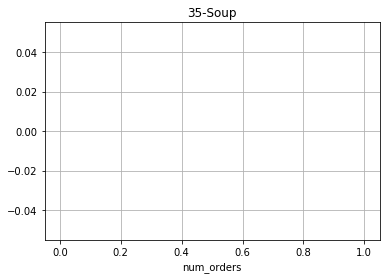

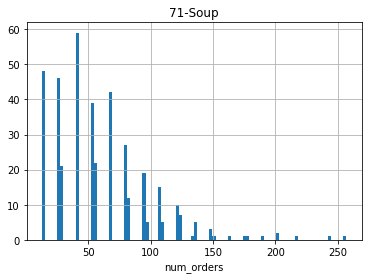

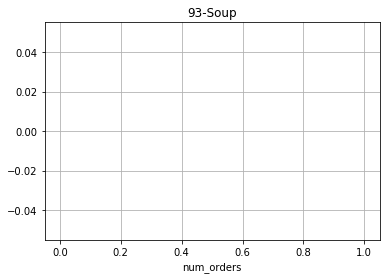

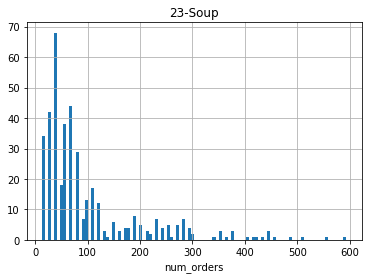

In [47]:
for v in train_merged['category'].unique():plot_for_category_hist(v,xaxis='num_orders')

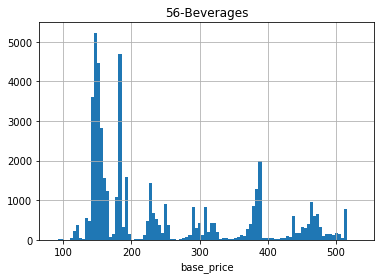

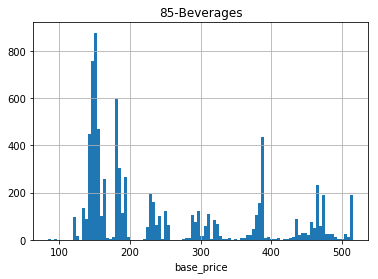

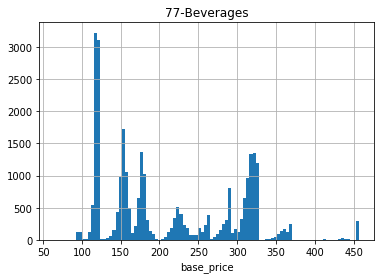

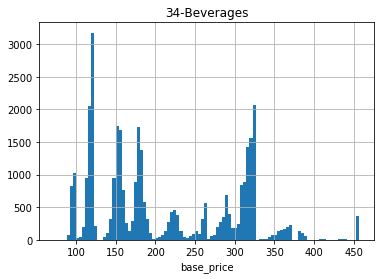

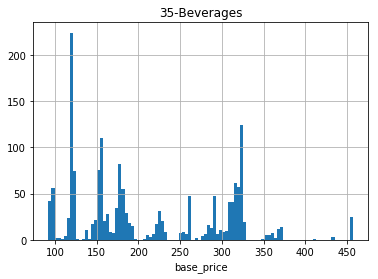

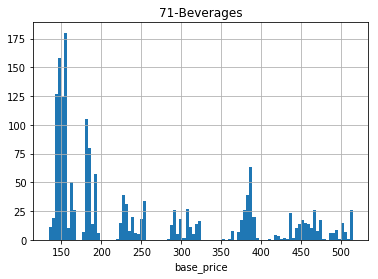

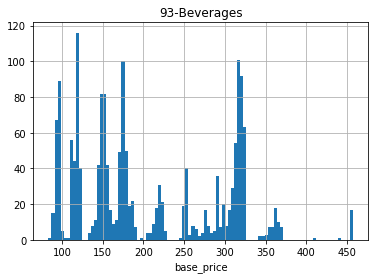

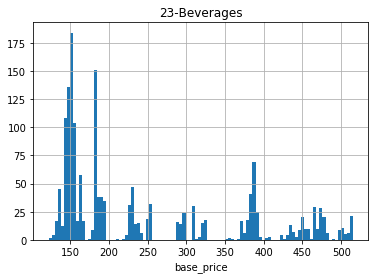

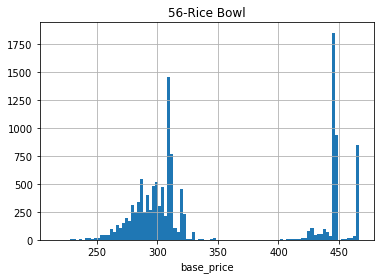

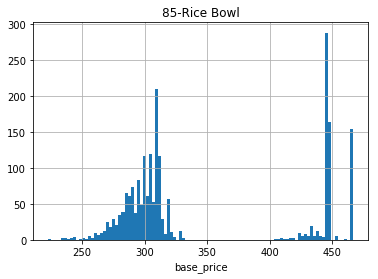

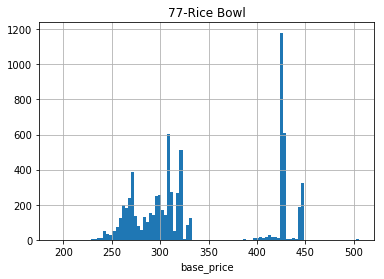

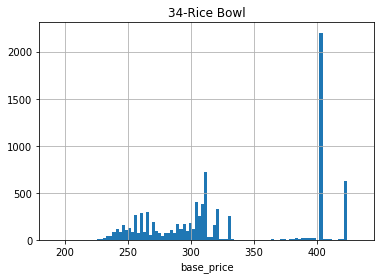

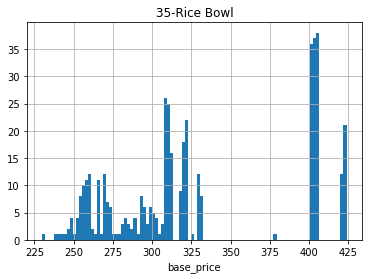

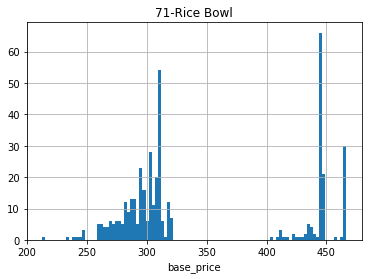

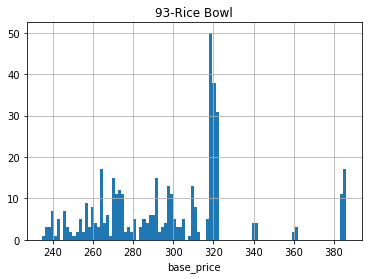

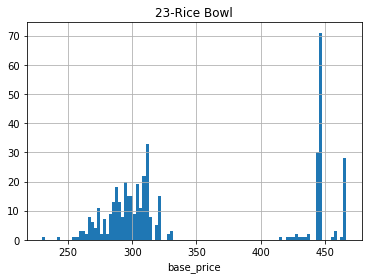

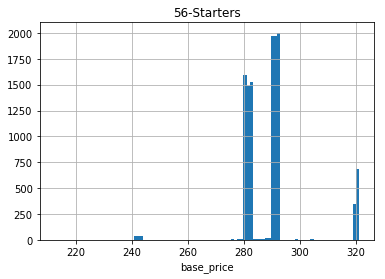

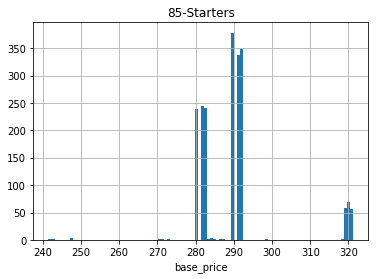

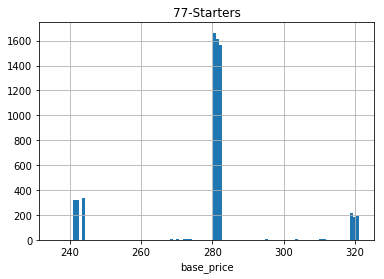

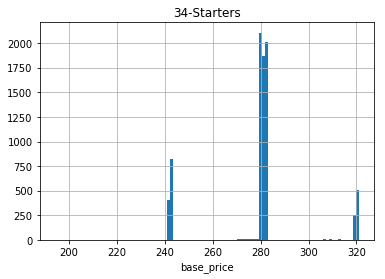

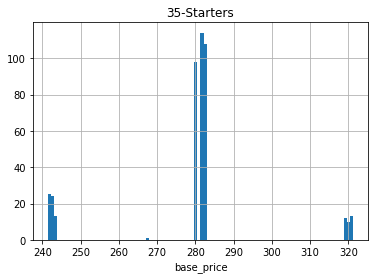

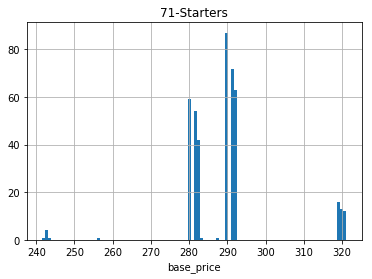

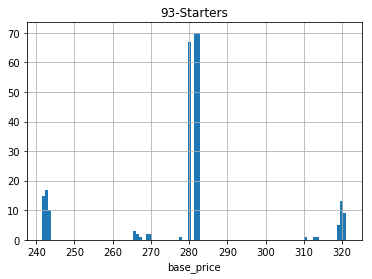

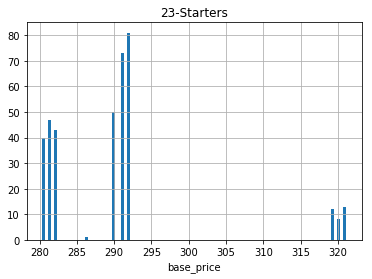

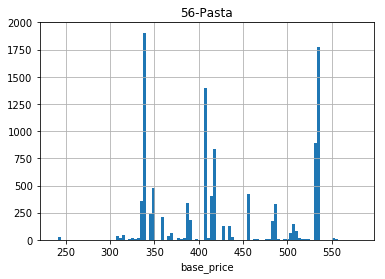

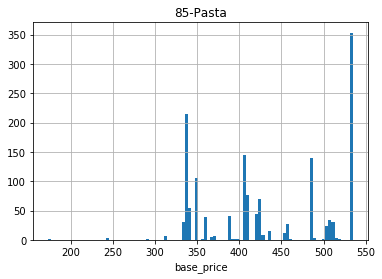

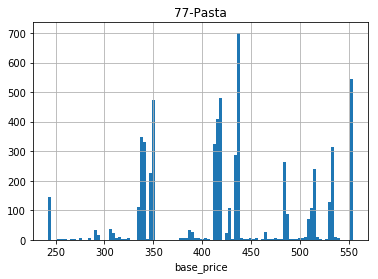

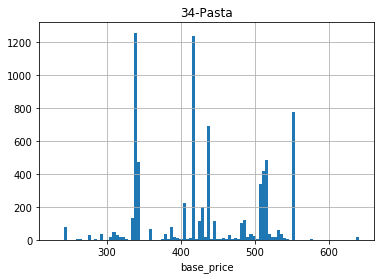

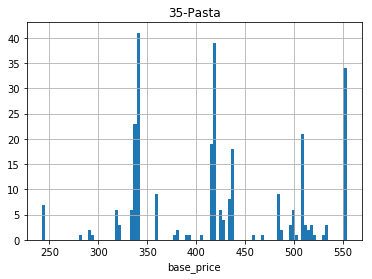

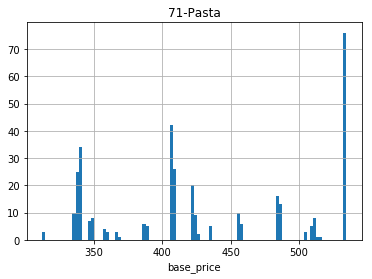

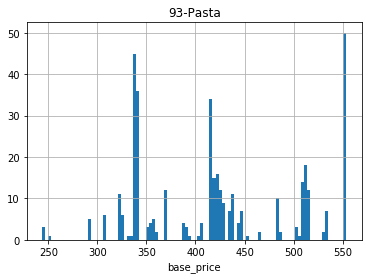

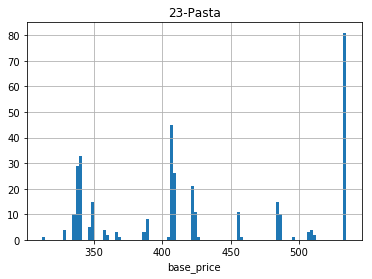

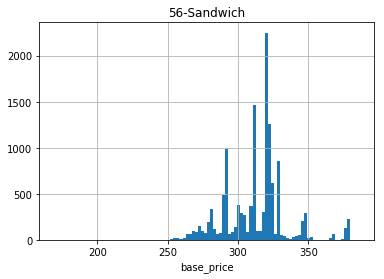

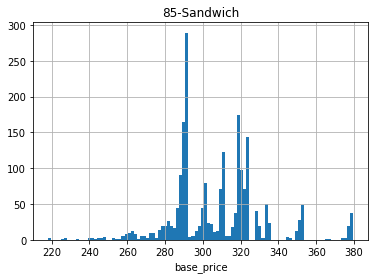

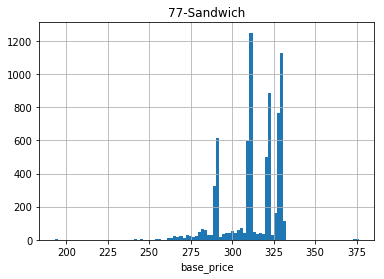

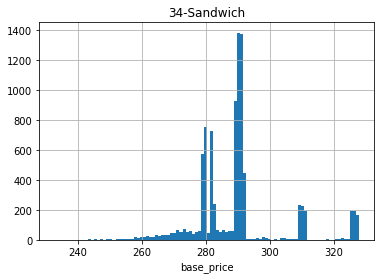

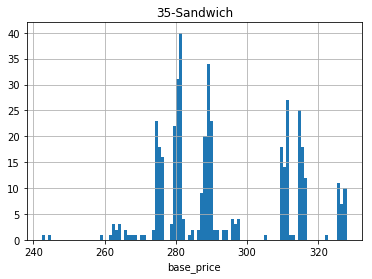

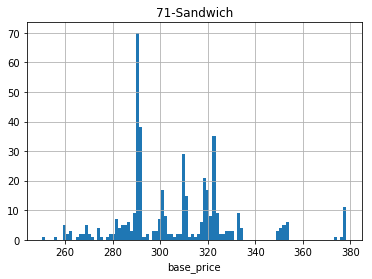

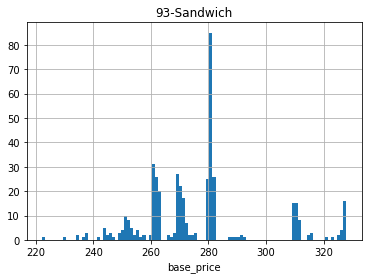

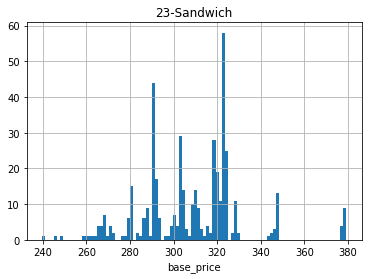

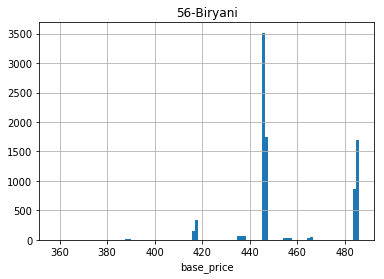

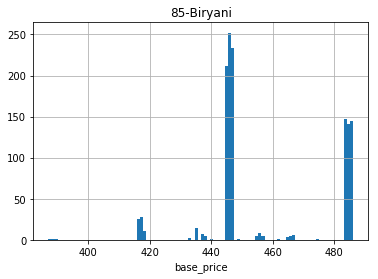

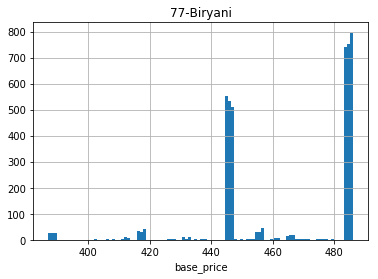

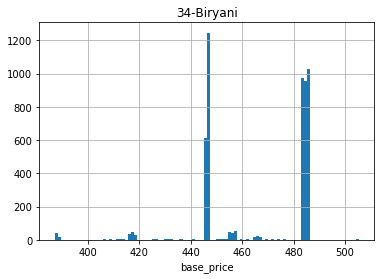

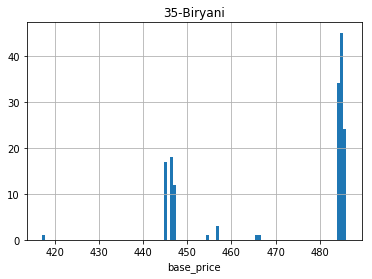

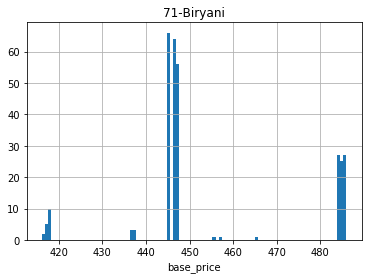

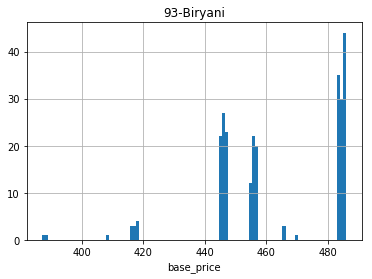

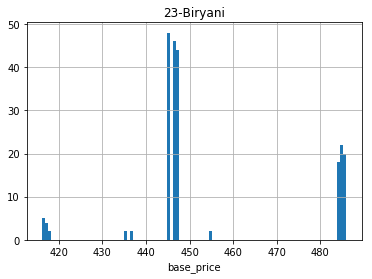

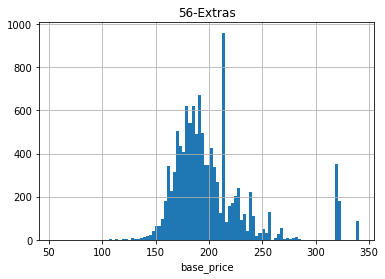

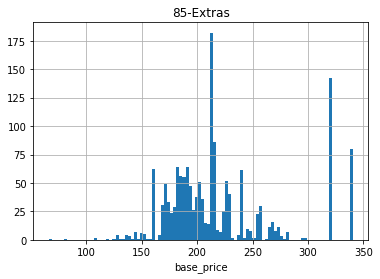

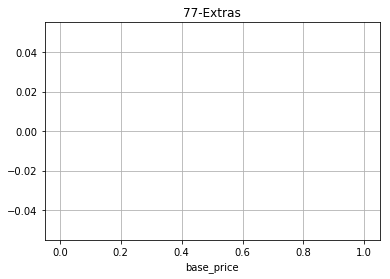

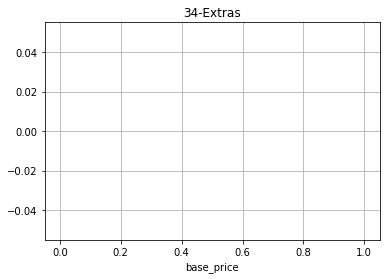

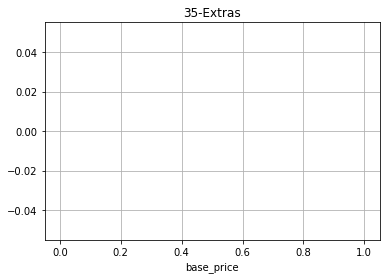

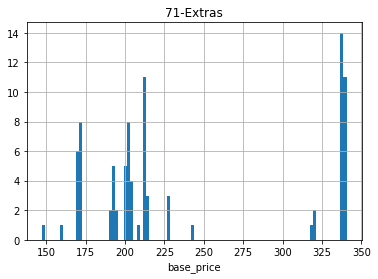

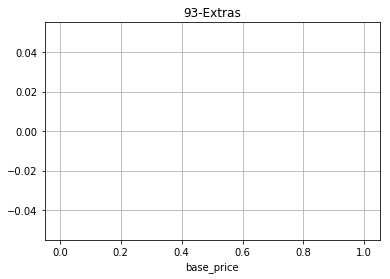

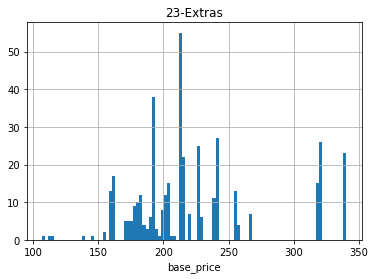

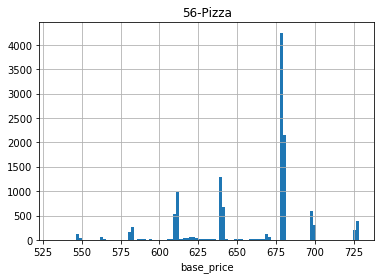

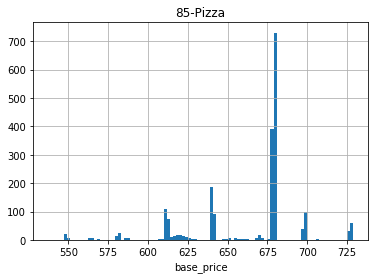

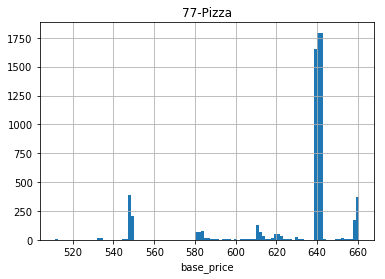

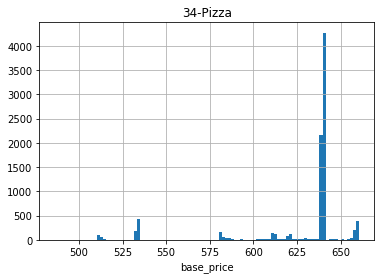

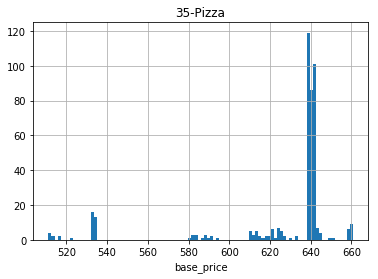

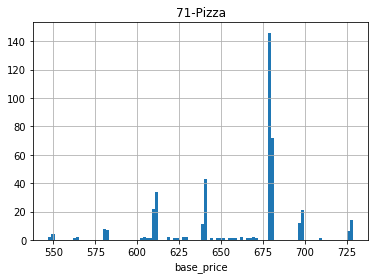

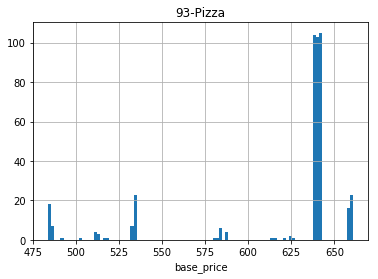

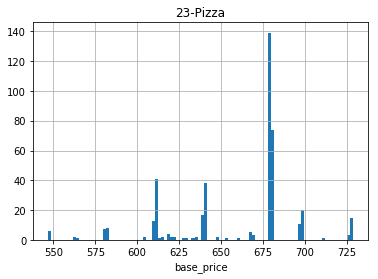

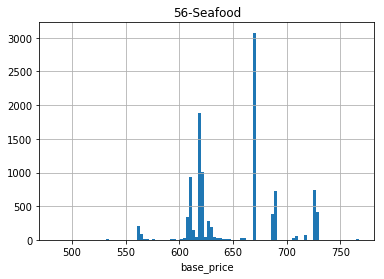

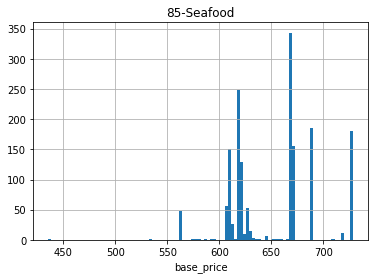

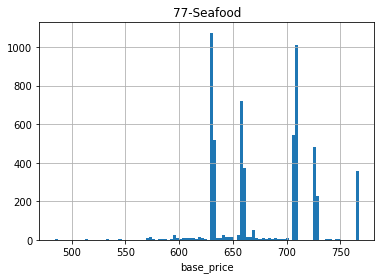

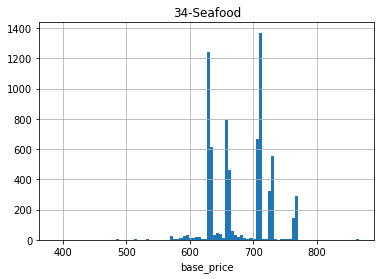

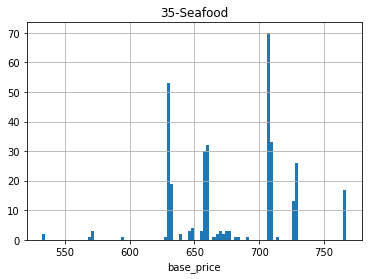

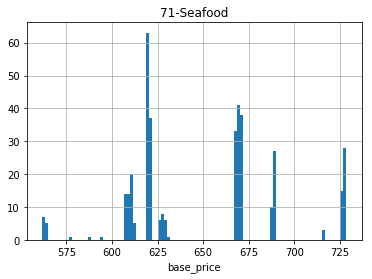

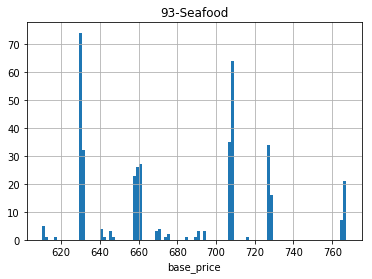

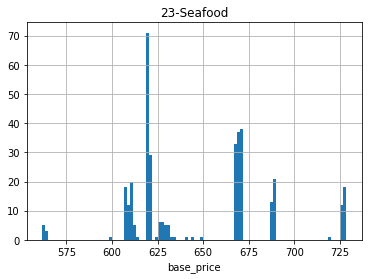

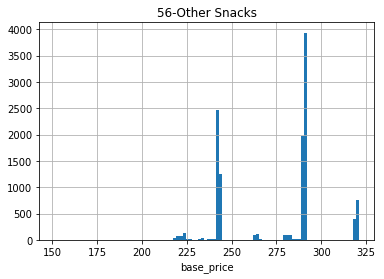

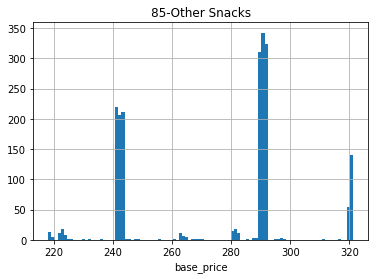

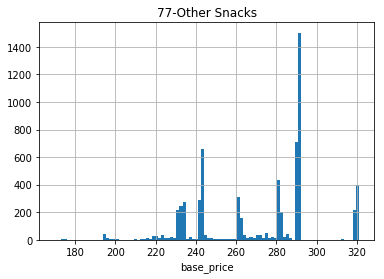

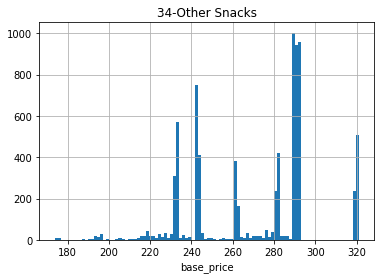

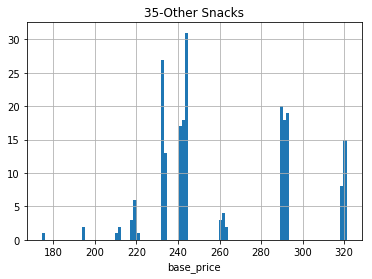

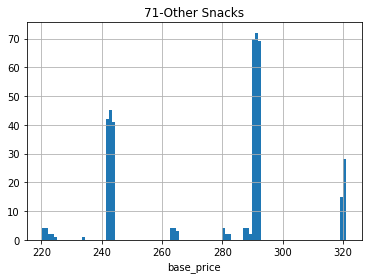

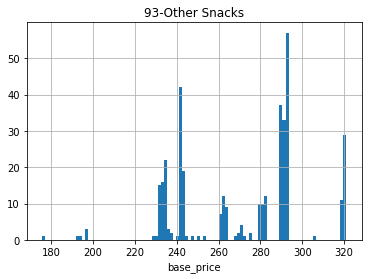

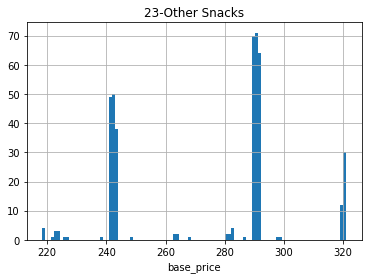

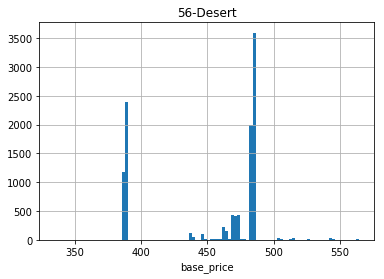

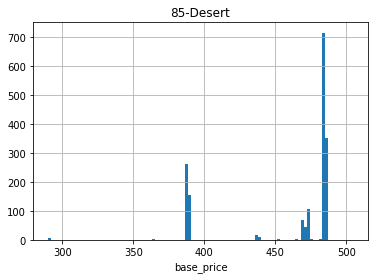

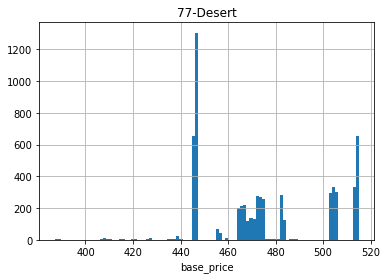

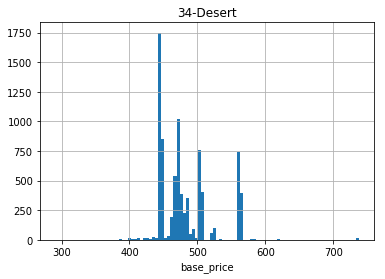

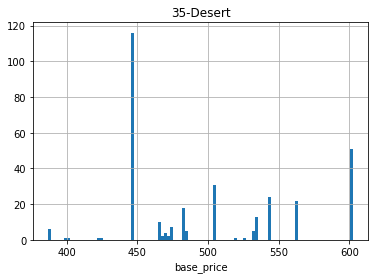

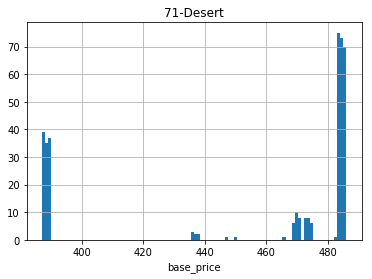

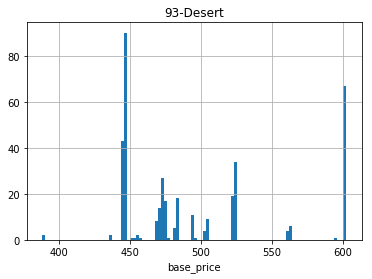

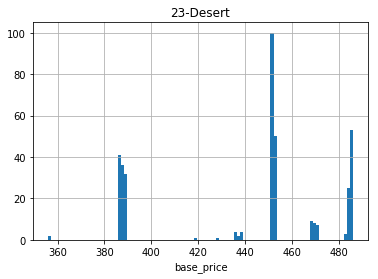

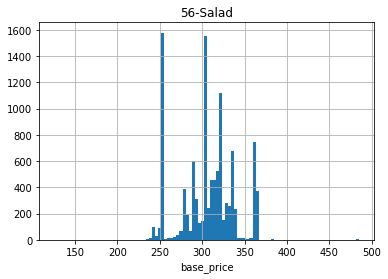

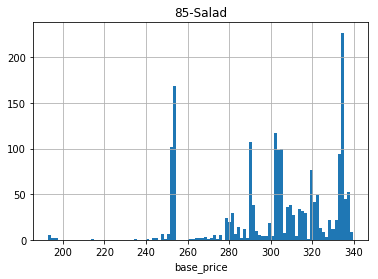

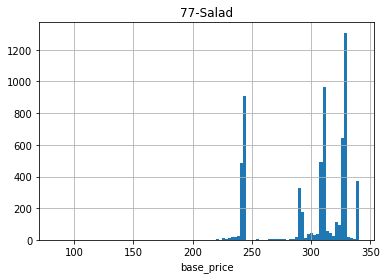

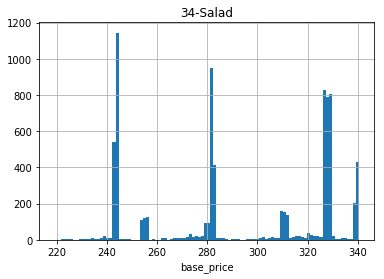

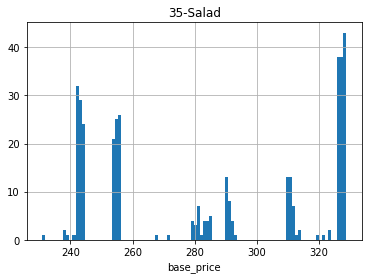

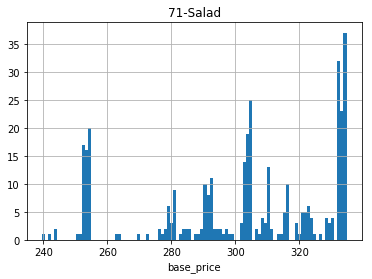

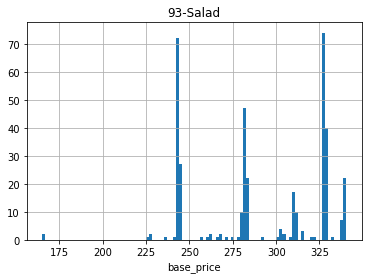

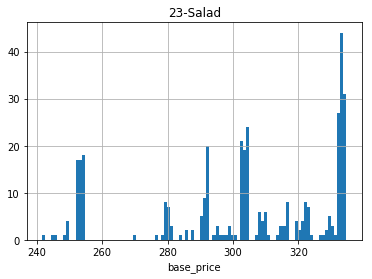

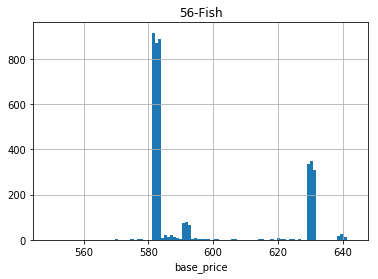

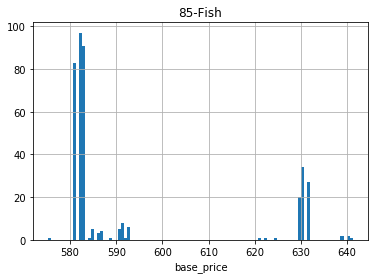

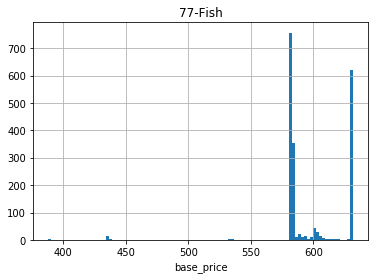

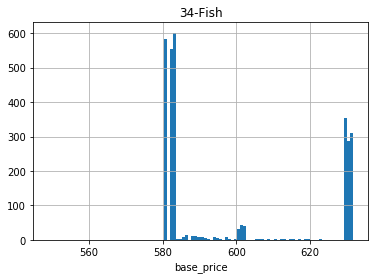

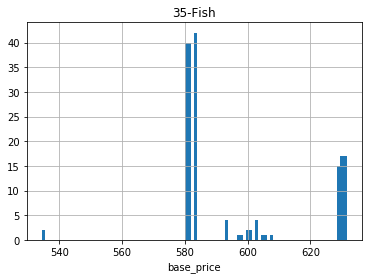

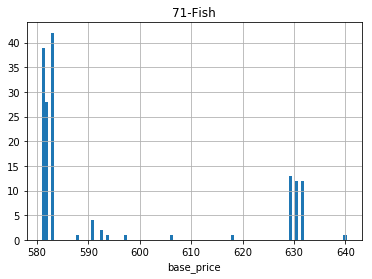

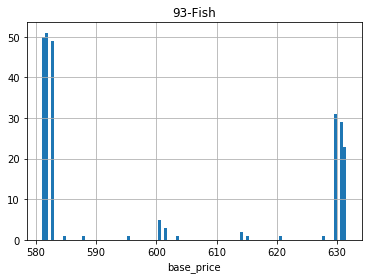

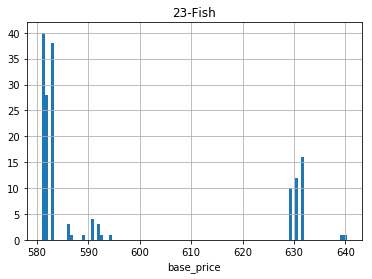

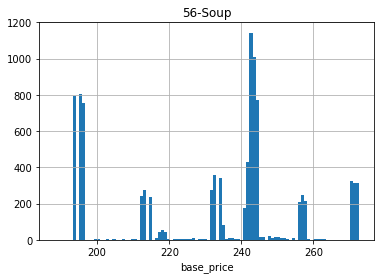

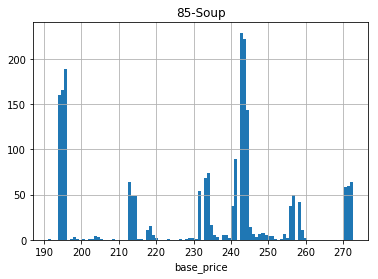

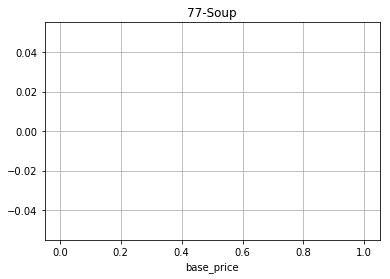

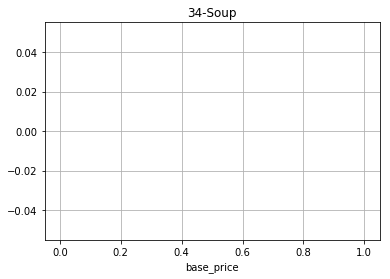

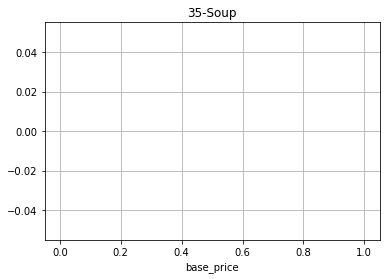

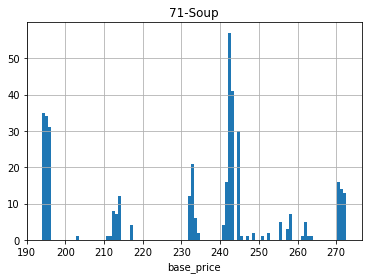

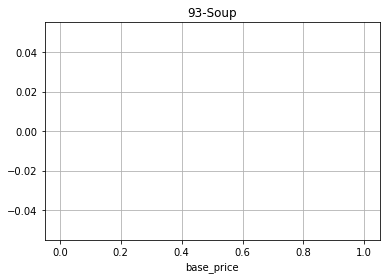

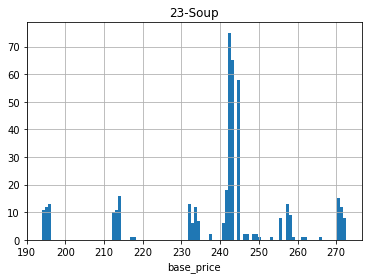

In [48]:
for v in train_merged['category'].unique():plot_for_category_hist(v,xaxis='base_price')

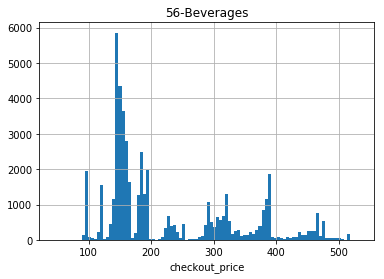

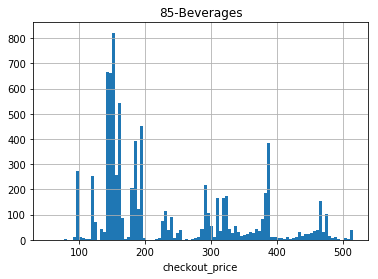

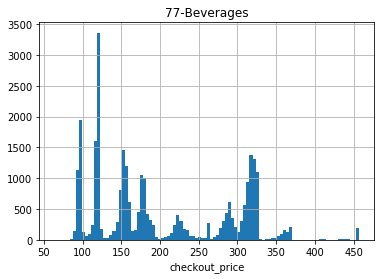

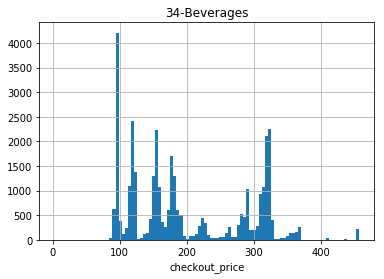

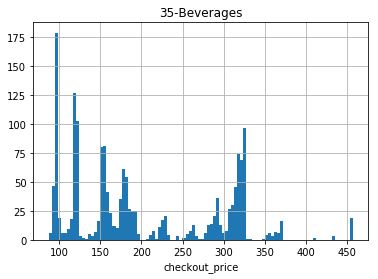

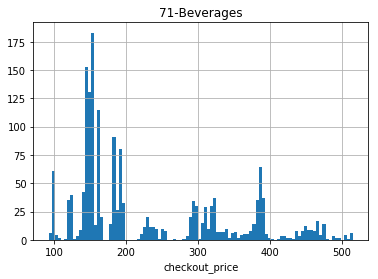

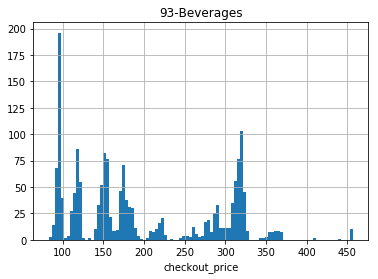

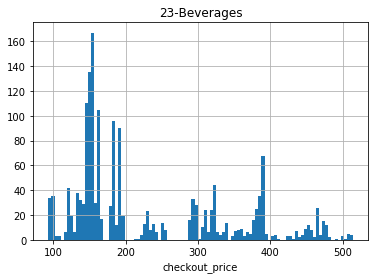

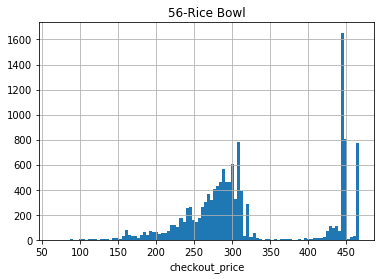

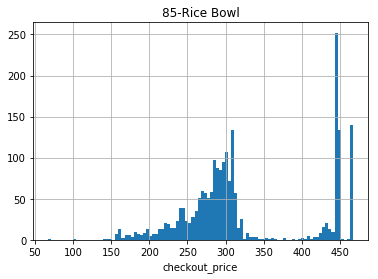

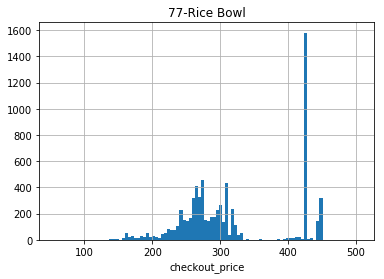

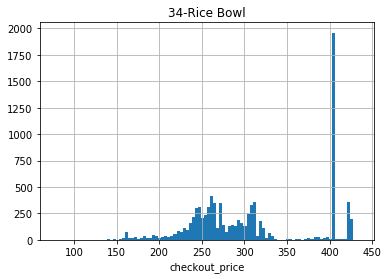

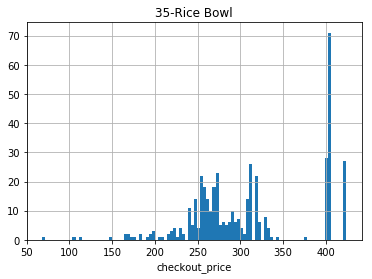

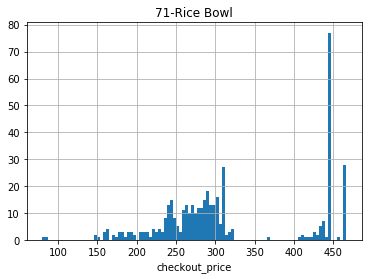

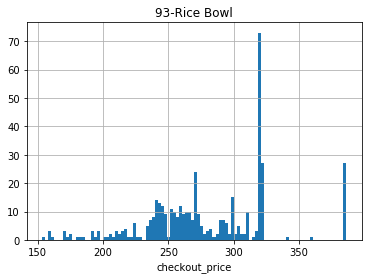

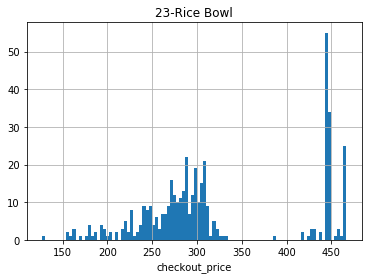

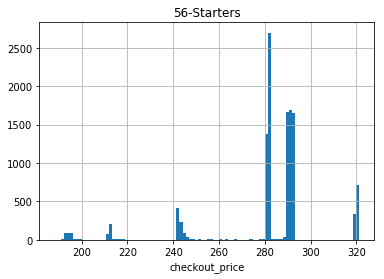

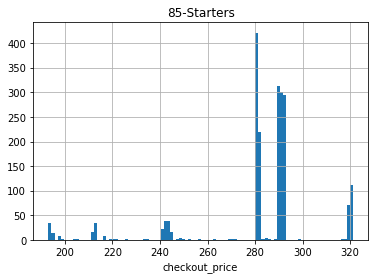

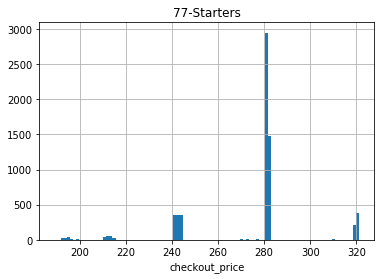

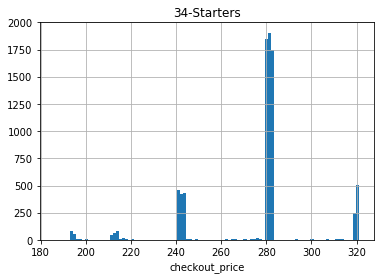

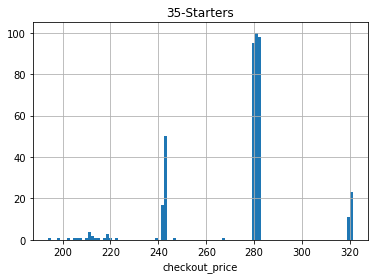

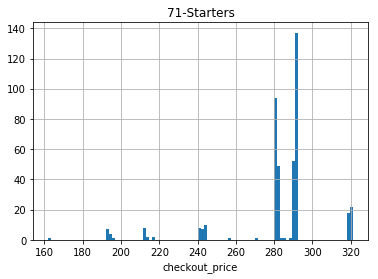

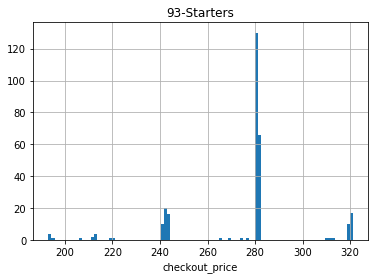

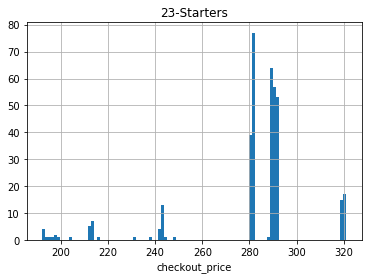

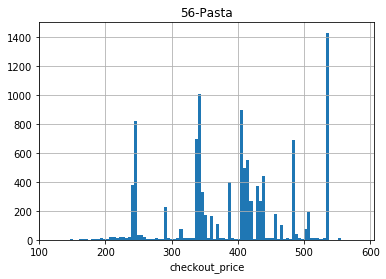

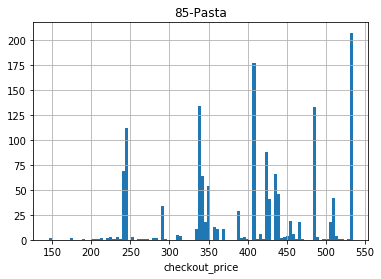

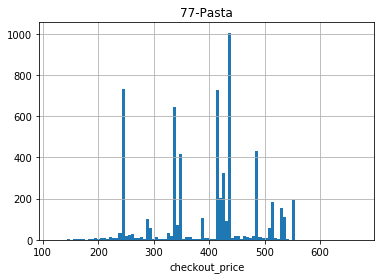

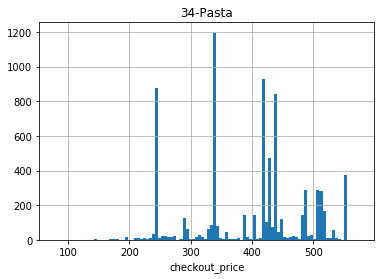

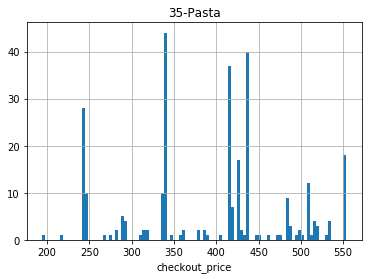

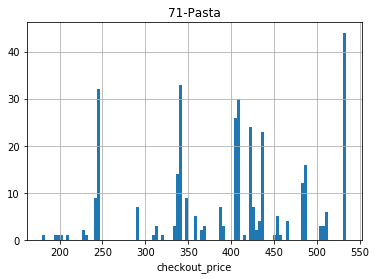

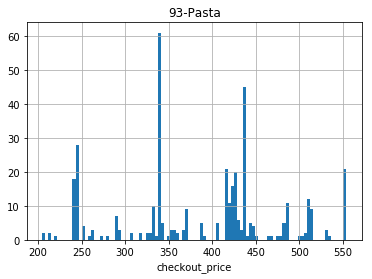

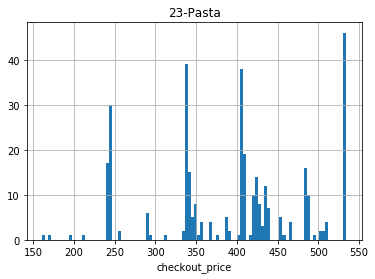

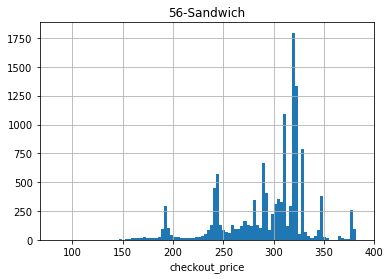

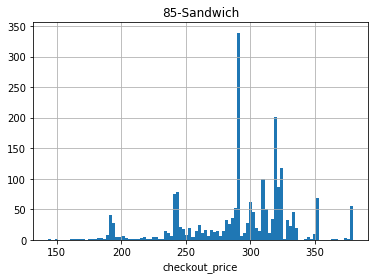

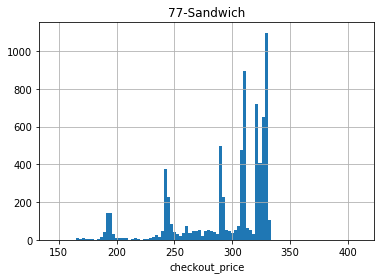

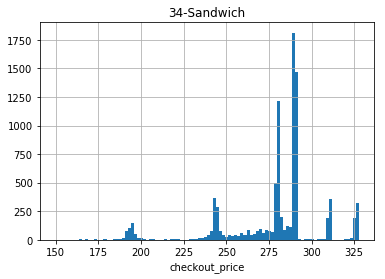

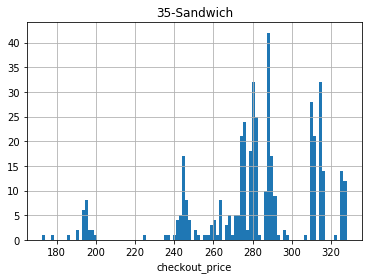

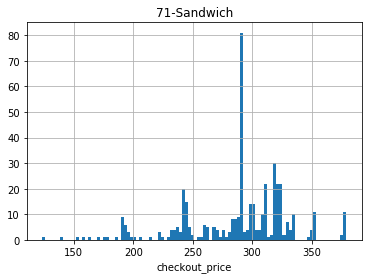

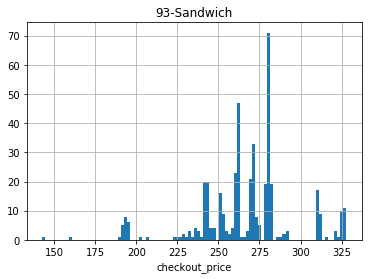

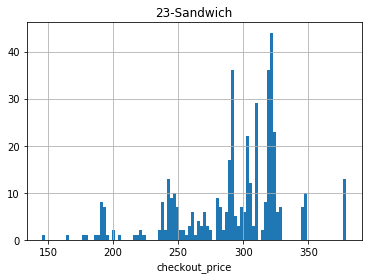

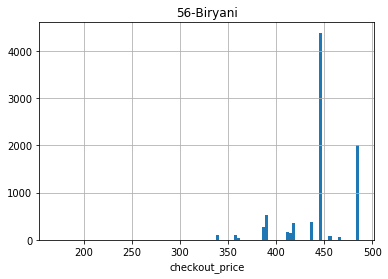

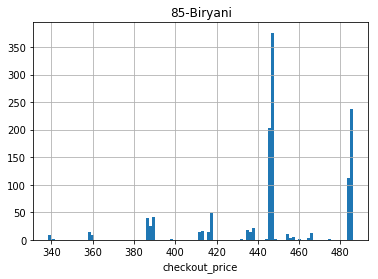

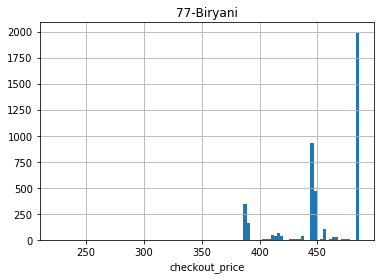

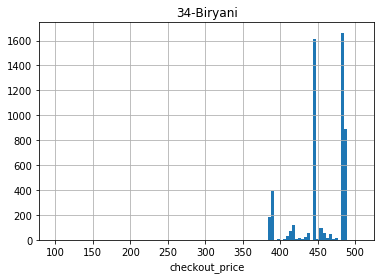

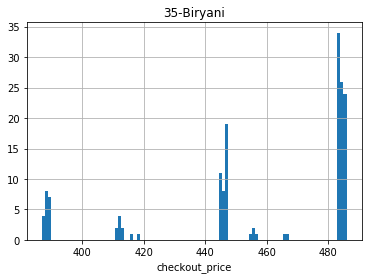

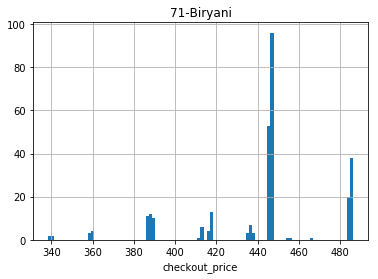

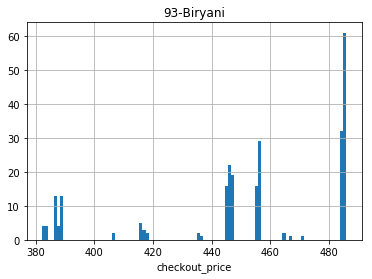

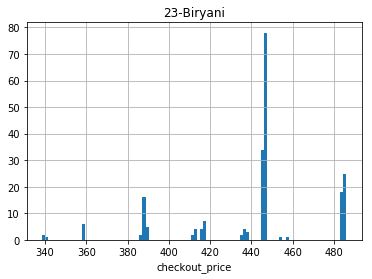

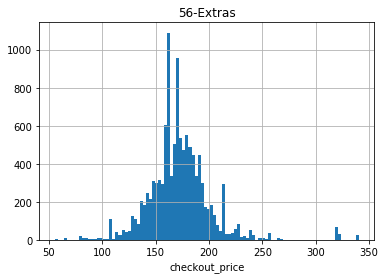

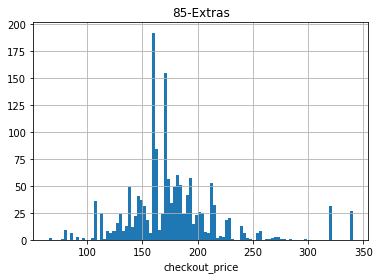

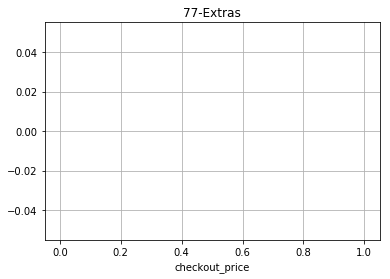

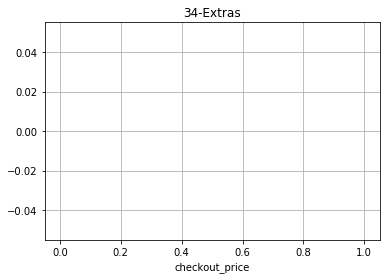

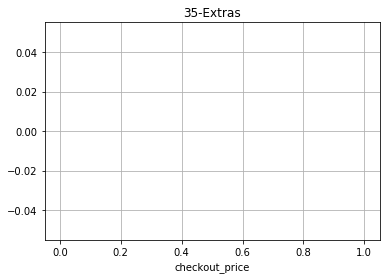

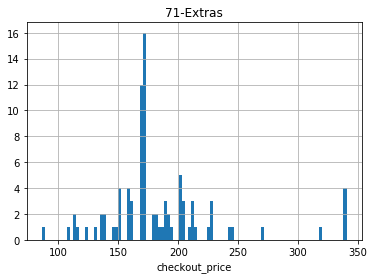

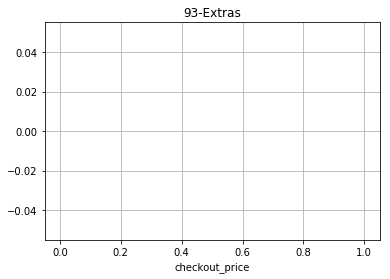

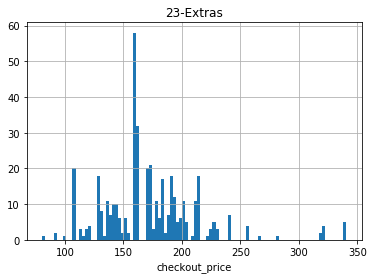

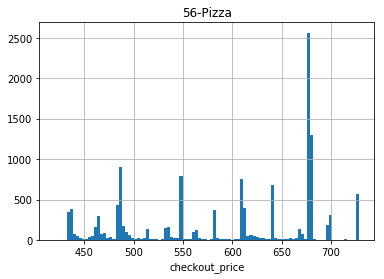

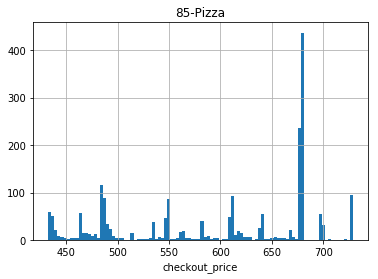

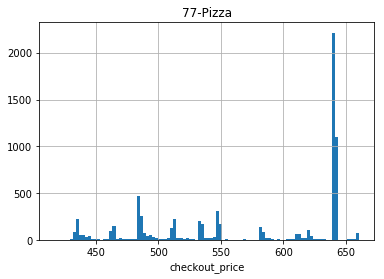

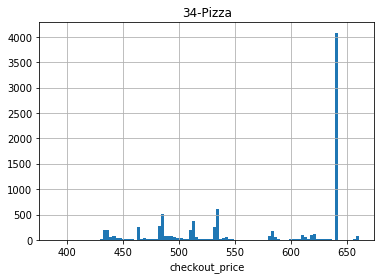

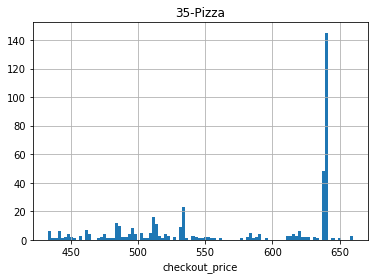

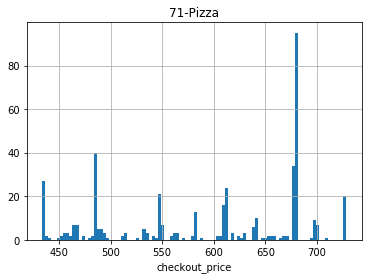

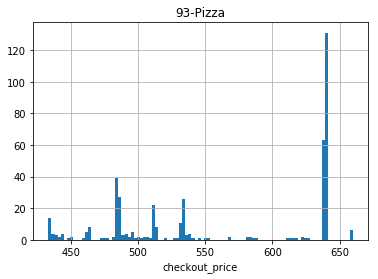

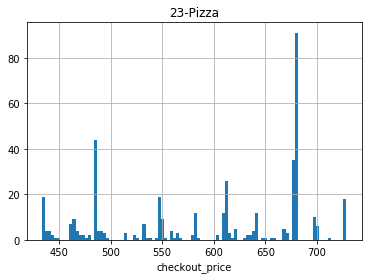

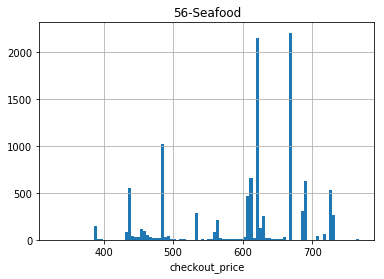

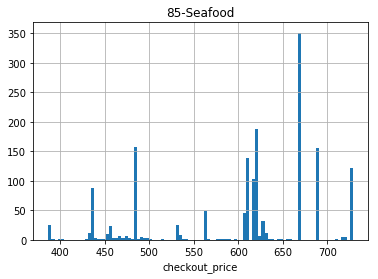

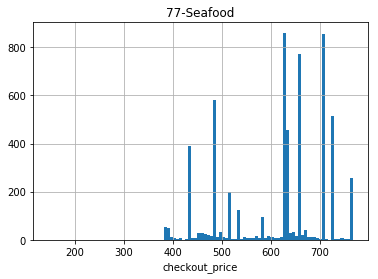

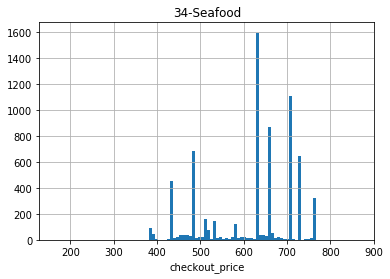

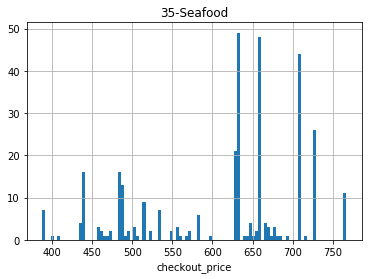

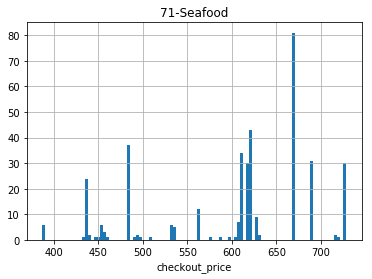

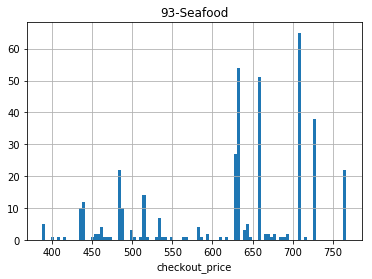

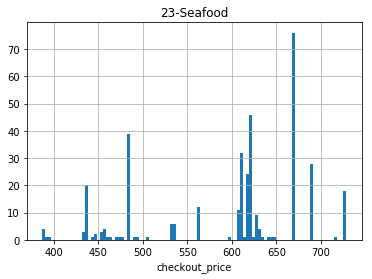

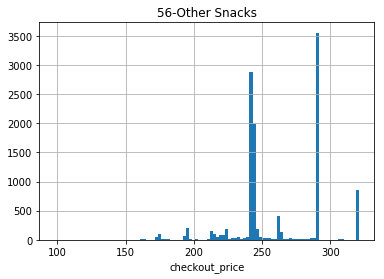

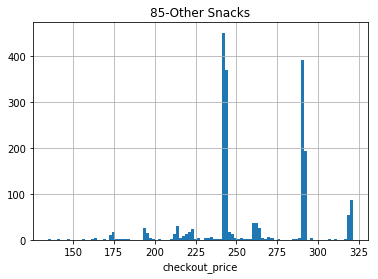

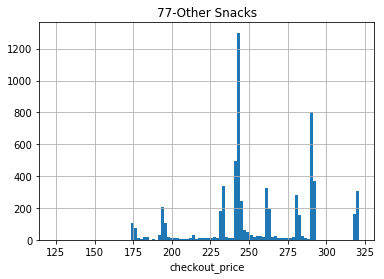

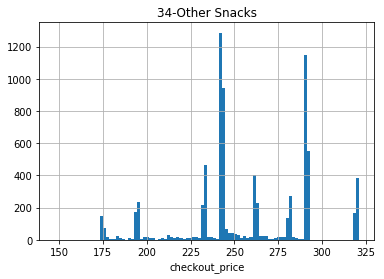

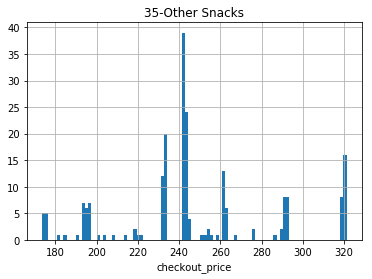

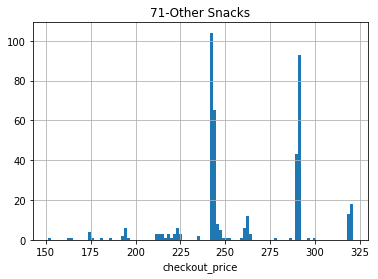

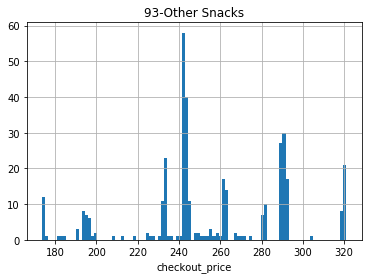

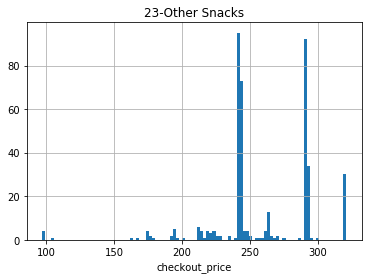

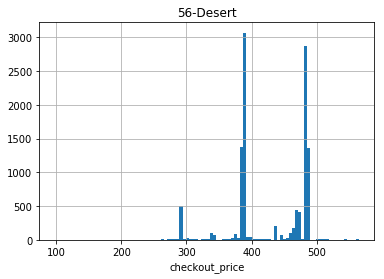

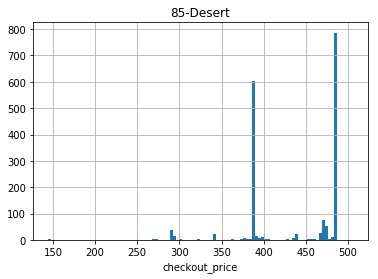

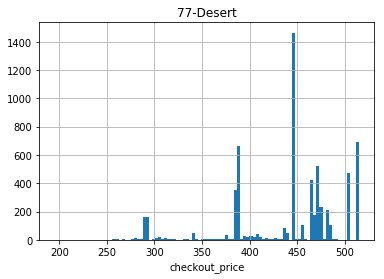

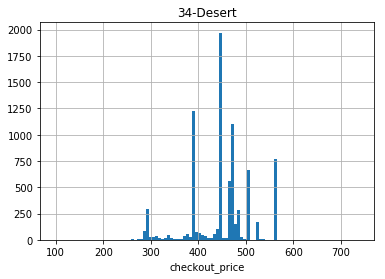

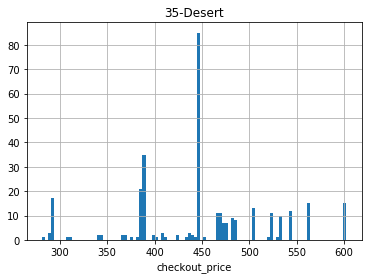

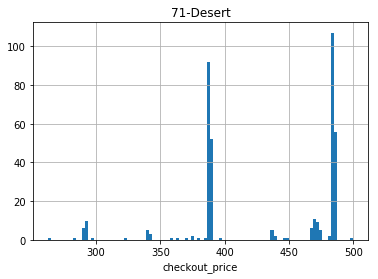

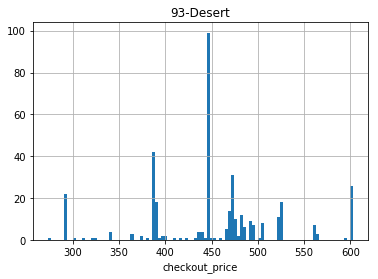

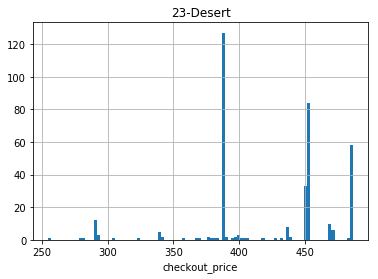

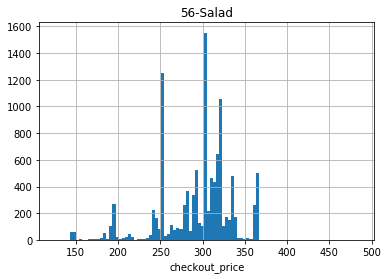

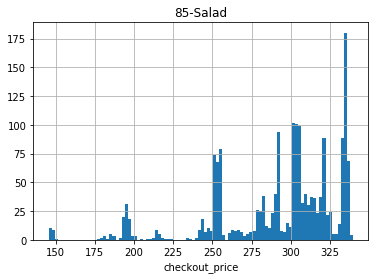

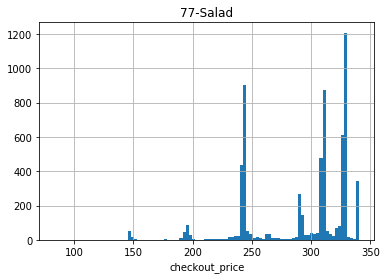

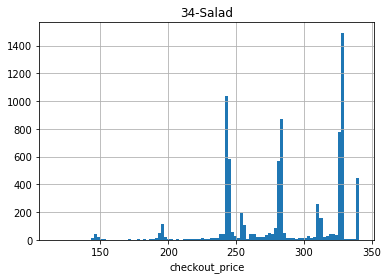

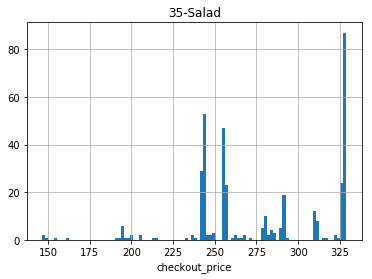

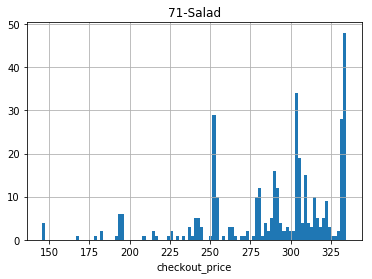

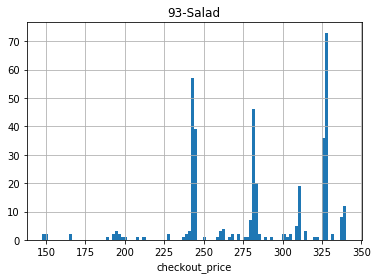

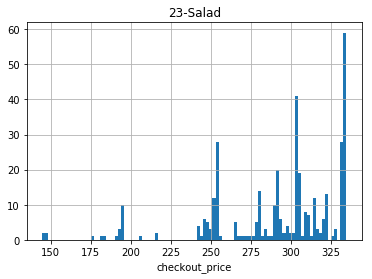

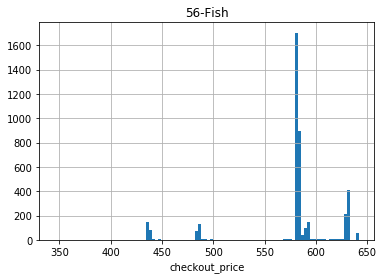

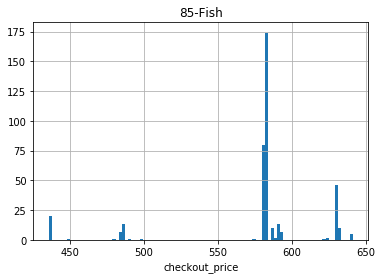

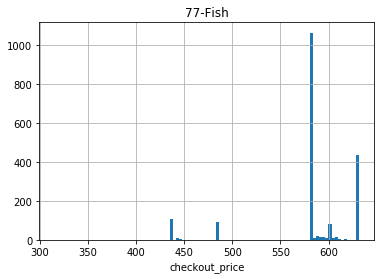

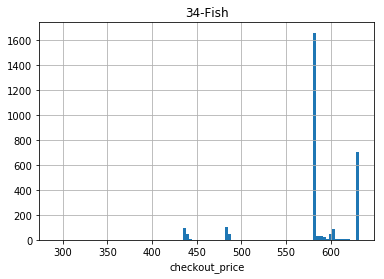

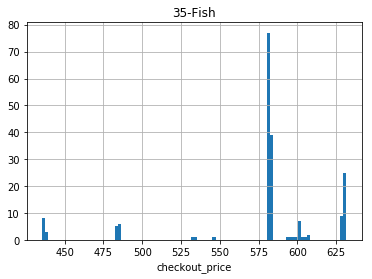

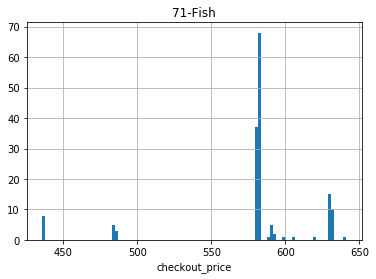

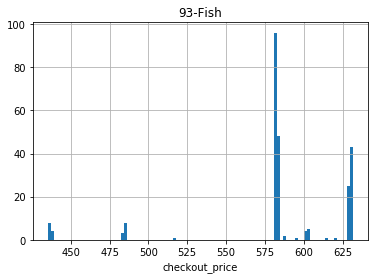

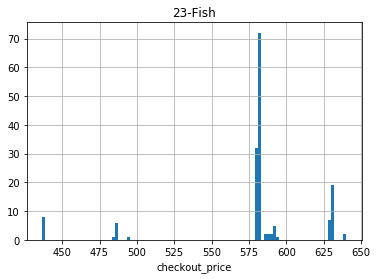

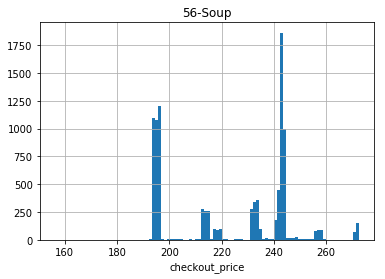

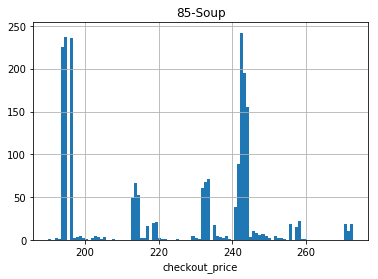

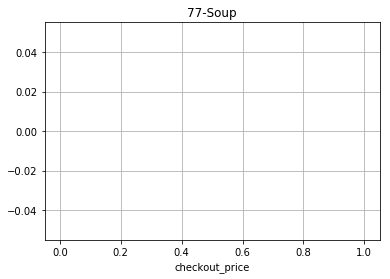

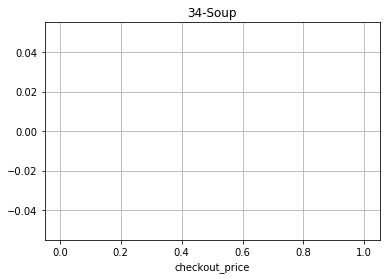

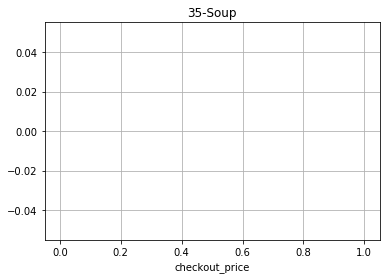

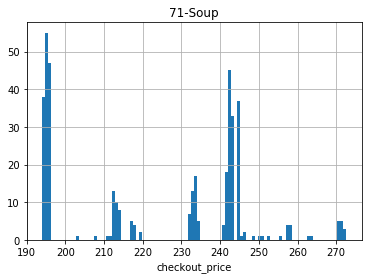

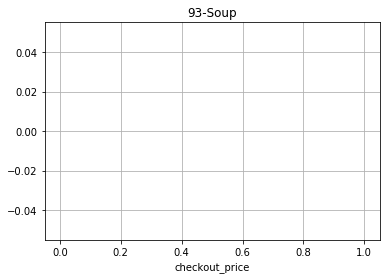

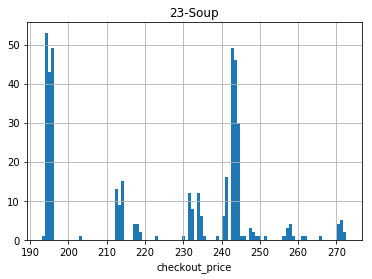

In [49]:
for v in train_merged['category'].unique():plot_for_category_hist(v,xaxis='checkout_price')

In [95]:
grouped=train_merged.groupby('region_code')
def get_bins(df,xaxis):
    for name in train_merged['category'].unique():
        for reg in train_merged['region_code'].unique():
            tmp=grouped.get_group(reg)
            tmp=tmp[tmp['category']==name]
            if tmp[xaxis].empty:
                #print('empty',tmp[xaxis])
                #print(str(reg)+'_'+name+'_'+xaxis)
                df[str(reg)+'_'+name+'_'+xaxis]=tmp[xaxis]
            else:
                df=df.reset_index(drop=True)
                #print('full',str(reg)+'_'+name+'_'+xaxis)
                print(pd.Series(pd.cut(tmp[xaxis],100).cat.codes))
                df[str(reg)+'_'+name+'_'+xaxis]=pd.Series(pd.cut(tmp[xaxis],100).cat.codes.values)
                
    return df

In [96]:
df=pd.DataFrame()
df=get_bins(df,xaxis='checkout_price')

0         18
1         18
2         17
3         18
4         20
5         20
6         20
7         20
8         18
9         20
10        20
11        20
12        20
13        19
14        14
15        14
16        15
17        15
18        15
19        15
20        15
21        15
22        23
23        24
24        24
25        24
26        15
27        15
28        15
29        15
          ..
445491    62
445492    68
445493    69
445494    70
445495    69
445496    57
445497    93
445498    93
445499    72
445500    68
445501    69
445502    69
445503    69
445504    59
445505    60
445506    58
445507    59
445508    68
445509    70
445510    69
445511    67
445512    70
445513    69
445514    70
445515    68
445516    69
445517    69
445518    69
445519    70
445520    68
Length: 50032, dtype: int8
5146      18
5147      17
5148      17
5149      17
5150      14
5151      19
5152      19
5153      20
5154      19
5155      19
5156      19
5157      19
5158      19
5159      1

115015    52
115016    59
115017    59
115018    59
115019    21
115020    21
115021    21
115022    20
115023    47
115024    57
115025    56
115026    54
115027    52
115028    57
115029    56
115030    59
115031    29
115032    48
115033    36
115034    43
115035    49
115036    57
115037    56
115038    59
115039    57
115040    57
115041    56
115042    54
115043    59
115044    59
          ..
115420    56
115421    39
115422    56
115423    48
115424    49
115425    59
115426    25
115427    29
115428    35
115429    37
115430    44
115431    40
115432    43
115433    49
115434    36
115435    36
115436    51
115437    57
115438    59
115439    17
115440    20
115441    20
115442    46
115443    49
115444    52
115445    41
115446    49
115447    54
115448    54
115449    47
Length: 435, dtype: int8
195935    45
195936    49
195937    50
195938    23
195939     2
195940     2
195941     3
195942     2
195943    43
195944    48
195945    44
195946    43
195947    50
195948    38


6879      24
6880      25
6881      25
6882      52
6883      52
6884      52
6885      52
6886      52
6887      52
6888      52
6889      52
6890      52
6891      51
6892      51
6893      52
6894      52
6895      52
6896      25
6897      24
6898      24
6899      24
6900      54
6901      55
6902      54
6903      54
6904      55
6905      25
6906      17
6907      49
6908      54
          ..
436442    71
436443    71
436444    71
436445    71
436446    71
436447    71
436448    71
436449    71
436450    71
436451    50
436452    49
436453    49
436454    49
436455    64
436456    71
436457    71
436458    71
436459    71
436460    71
436461    71
436462    71
436463    71
436464    71
436465    49
436466    49
436467    74
436468    74
436469    37
436470    37
436471    74
Length: 1499, dtype: int8
19479     22
19480     22
19481     22
19482     22
19483     22
19484     22
19485     22
19486     22
19487     22
19488     22
19489     22
19490     22
19491     22
19492     39

428005    69
428006    70
428007    70
428008    70
428009    70
428010    70
428011    70
428012    70
428013    70
428014    32
428015    44
428016    43
428017    70
428018    70
428019    75
428020    74
428021    74
428022    23
428023    43
428024    75
428025    74
428026    73
428027    74
428028    74
428029    75
428030    74
428031    74
428032    63
428033    63
428034    74
          ..
428409    75
428410    75
428411    75
428412    75
428413    76
428414    19
428415    19
428416    20
428417    20
428418    62
428419    76
428420    75
428421    50
428422    58
428423    76
428424    77
428425    19
428426    31
428427    78
428428    77
428429    78
428430    78
428431    78
428432    77
428433    78
428434    77
428435    78
428436    85
428437    85
428438    85
Length: 434, dtype: int8
2741      69
2742      69
2743      87
2744      87
2745      87
2746      87
2747      87
2748      87
2749      87
2750      87
2751      87
2752      87
2753      87
2754      59


116351    49
116352    45
116353    29
116354    17
116355    28
116356     8
116357    29
116358    99
116359    32
116360    25
116361    45
116362     0
116363    32
116364    33
116365    11
116366    32
116367    45
116368    20
116369    20
116370    10
116371    33
116372    25
116373    32
116374    55
116375    46
116376    32
116377    55
116378    54
116379    61
116380    29
          ..
118256    24
118257    45
118258    45
118259    40
118260    46
118261    99
118262    32
118263    33
118264    33
118265    32
118266    25
118267    55
118268    40
118269    49
118270    33
118271    38
118272    28
118273    48
118274    49
118275    36
118276    37
118277    32
118278    41
118279    33
118280    33
118281    50
118282    33
118283    40
118284    37
118285    33
Length: 89, dtype: int8
428515    27
428516    22
428517    30
428518    23
428519    38
428520    45
428521    51
428522    43
428523    35
428524    30
428525    57
428526    18
428527    23
428528    30
4

20720     83
20721     82
20722     82
20723     82
20724     56
20725     54
20726     82
20727     82
20728     46
20729     46
20730     46
20731     82
20732     84
20733     82
20734     82
20735     82
20736     82
20737     82
20738     82
20739     82
20740     82
20741     82
20742     82
20743     75
20744     62
20745     62
20746     62
20747     79
20748     82
20749     82
          ..
454525    90
454526    90
454527    90
454528    90
454529    90
454530    93
454531    93
454532    93
454533    93
454534    93
454535    52
454536    53
454537    93
454538    93
454539    93
454540    93
454541    93
454542    99
454543    99
454544    99
454545    57
454546    54
454547    99
454548    99
454549    99
454550    93
454551    93
454552    93
454553    93
454554    70
Length: 5792, dtype: int8
26699     70
26700     70
26701     70
26702     70
26703     48
26704     45
26705     70
26706     70
26707     38
26708     38
26709     38
26710     70
26711     70
26712     70

198105    47
198106    47
198107    48
198108    51
198109    72
198110    73
198111    73
198112    73
198113    72
198114    46
198115    47
198116    47
198117    72
198118    73
198119    73
198120    46
198121    47
198122    46
198123    80
198124    80
198125    65
198126    46
198127    48
198128    47
198129    80
198130    78
198131    48
198132    46
198133    47
198134    47
          ..
199034    47
199035    46
199036    46
199037    46
199038    47
199039    14
199040    30
199041    59
199042    60
199043    60
199044    59
199045    59
199046    59
199047    59
199048    13
199049    13
199050    13
199051    59
199052    59
199053    60
199054    60
199055    60
199056    60
199057    60
199058    60
199059    59
199060    59
199061    60
199062     7
199063    16
Length: 370, dtype: int8
429586    64
429587    65
429588    65
429589    65
429590    86
429591    86
429592    86
429593    86
429594    87
429595    64
429596    65
429597    67
429598    86
429599    86


22635     94
22636     95
22637     95
22638     95
22639     94
22640     94
22641     95
22642     94
22643     94
22644     95
22645     62
22646     93
22647     95
22648     95
22649     95
22650     95
22651     94
22652     94
22653     95
22654     94
22655     63
22656     95
22657     95
22658     95
22659     95
22660     95
22661     95
22662     94
22663     95
22664     95
          ..
456346    80
456347    42
456348    43
456349    69
456350    80
456351    81
456352    79
456353    81
456354    80
456355    45
456356    81
456357    72
456358    70
456359    80
456360    80
456361    81
456362    81
456363    81
456364    81
456365    81
456366    81
456367    81
456368    81
456369    80
456370    63
456371    81
456372    81
456373    80
456374    80
456375    81
Length: 6373, dtype: int8
28578     64
28579     91
28580     93
28581     93
28582     94
28583     94
28584     94
28585     94
28586     94
28587     94
28588     94
28589     93
28590     94
28591     56

199704    99
199705    99
199706    99
199707    98
199708    99
199709    98
199710    99
199711    98
199712    99
199713    98
199714    98
199715    98
199716    99
199717    98
199718    99
199719    98
199720    99
199721    99
199722    98
199723    75
199724    74
199725    74
199726    75
199727    74
199728    75
199729    74
199730    74
199731    74
199732    75
199733    74
          ..
199924    74
199925    74
199926    74
199927    75
199928    75
199929    75
199930    74
199931    75
199932    74
199933    81
199934    98
199935    99
199936    99
199937     0
199938     1
199939     0
199940     0
199941    84
199942    85
199943    85
199944    98
199945    99
199946    99
199947    25
199948    24
199949    74
199950    74
199951    74
199952    75
199953    74
Length: 250, dtype: int8
431800    95
431801    95
431802    95
431803    95
431804    95
431805    94
431806    95
431807    95
431808    95
431809    70
431810    71
431811    71
431812    70
431813    71


In [97]:
df

56_Beverages_checkout_price  85_Beverages_checkout_price  \
0                               18                         18.0   
1                               18                         17.0   
2                               17                         17.0   
3                               18                         17.0   
4                               20                         14.0   
5                               20                         19.0   
6                               20                         19.0   
7                               20                         20.0   
8                               18                         19.0   
9                               20                         19.0   
10                              20                         19.0   
11                              20                         19.0   
12                              20                         19.0   
13                              19                         19.0   
14                              14                         19.0   
15                              14                         20.0   
16                              15                         19.0   
17                              15                         19.0   
18                              15                         20.0   
19                              15                         19.0   
20                              15                         19.0   
21                              15                         19.0   
22                              23                         14.0   
23                              24                         15.0   
24                              24                         14.0   
25                              24                         14.0   
26                              15                         15.0   
27                              15                         14.0   
28                              15                         14.0   
29                              15                         14.0   
...                            ...                          ...   
50002                           62                          NaN   
50003                           68                          NaN   
50004                           69                          NaN   
50005                           70                          NaN   
50006                           69                          NaN   
50007                           57                          NaN   
50008                           93                          NaN   
50009                           93                          NaN   
50010                           72                          NaN   
50011                           68                          NaN   
50012                           69                          NaN   
50013                           69                          NaN   
50014                           69                          NaN   
50015                           59                          NaN   
50016                           60                          NaN   
50017                           58                          NaN   
50018                           59                          NaN   
50019                           68                          NaN   
50020                           70                          NaN   
50021                           69                          NaN   
50022                           67                          NaN   
50023                           70                          NaN   
50024                           69                          NaN   
50025                           70                          NaN   
50026                           68                          NaN   
50027                           69                          NaN   
50028                           69                          NaN   
50029                           69                    

# Neural Network with tf

In [4]:
import tensorflow as tf

F:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [15]:
mlp=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    
    tf.keras.layers.Dense(300,activation='relu'),
    
    tf.keras.layers.Dense(1)
])

In [11]:
train_merged.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [16]:
train_merged.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
category                     14
cuisine                       4
city_code                    51
region_code                   8
center_type                   3
op_area                      30
dtype: int64

In [5]:
numeric_cols=['base_price','checkout_price','op_area']
numeric_feat=[tf.feature_column.numeric_column(col) for col in numeric_cols]
numeric_feat

[_NumericColumn(key='base_price', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='checkout_price', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='op_area', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [6]:
cat_colums=['week','emailer_for_promotion','homepage_featured','category','cuisine','city_code','region_code','center_type']

In [7]:
week_embed=tf.feature_column.categorical_column_with_identity('week',200)
city_embed=tf.feature_column.categorical_column_with_identity('city_code',1000)
region_embed=tf.feature_column.categorical_column_with_identity('region_code',1000)
category_embed=tf.feature_column.categorical_column_with_vocabulary_list('category',train_merged['category'].unique().tolist())

In [8]:
total_embed_columns=[tf.feature_column.embedding_column(col,dim) for col,dim in zip([week_embed,city_embed,region_embed,category_embed],
                                                                             [64,16,2,8])]

total_embed_columns

[_EmbeddingColumn(categorical_column=_IdentityCategoricalColumn(key='week', num_buckets=200, default_value=None), dimension=64, combiner='mean', layer_creator=<function embedding_column.<locals>._creator at 0x000001BA3C110268>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True),
 _EmbeddingColumn(categorical_column=_IdentityCategoricalColumn(key='city_code', num_buckets=1000, default_value=None), dimension=16, combiner='mean', layer_creator=<function embedding_column.<locals>._creator at 0x000001BA3C110598>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True),
 _EmbeddingColumn(categorical_column=_IdentityCategoricalColumn(key='region_code', num_buckets=1000, default_value=None), dimension=2, combiner='mean', layer_creator=<function embedding_column.<locals>._creator at 0x000001BA3C110488>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True),
 _EmbeddingColumn(categorical_column=_VocabularyListCateg

In [10]:
cat_feat=[tf.feature_column.categorical_column_with_vocabulary_list('cuisine',train_merged['cuisine'].unique().tolist()),
    tf.feature_column.categorical_column_with_vocabulary_list('center_type',train_merged['center_type'].unique().tolist()),
    tf.feature_column.categorical_column_with_identity('emailer_for_promotion',2),
    tf.feature_column.categorical_column_with_identity('homepage_featured',2)]
cat_feat

[_VocabularyListCategoricalColumn(key='cuisine', vocabulary_list=('Thai', 'Indian', 'Italian', 'Continental'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 _VocabularyListCategoricalColumn(key='center_type', vocabulary_list=('TYPE_C', 'TYPE_B', 'TYPE_A'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 _IdentityCategoricalColumn(key='emailer_for_promotion', num_buckets=2, default_value=None),
 _IdentityCategoricalColumn(key='homepage_featured', num_buckets=2, default_value=None)]

In [11]:
features=numeric_feat+total_embed_columns+cat_feat
features,len(features)

([_NumericColumn(key='base_price', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
  _NumericColumn(key='checkout_price', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
  _NumericColumn(key='op_area', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
  _EmbeddingColumn(categorical_column=_IdentityCategoricalColumn(key='week', num_buckets=200, default_value=None), dimension=64, combiner='mean', layer_creator=<function embedding_column.<locals>._creator at 0x000001BA3C110268>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True),
  _EmbeddingColumn(categorical_column=_IdentityCategoricalColumn(key='city_code', num_buckets=1000, default_value=None), dimension=16, combiner='mean', layer_creator=<function embedding_column.<locals>._creator at 0x000001BA3C110598>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True),
  _EmbeddingColumn(categorical_column=_IdentityCatego

In [13]:
crossed_feat=tf.feature_column.crossed_column([category_embed,city_embed,region_embed],1000)

_CrossedColumn(keys=(_VocabularyListCategoricalColumn(key='category', vocabulary_list=('Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich', 'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert', 'Salad', 'Fish', 'Soup'), dtype=tf.string, default_value=-1, num_oov_buckets=0), _IdentityCategoricalColumn(key='city_code', num_buckets=1000, default_value=None), _IdentityCategoricalColumn(key='region_code', num_buckets=1000, default_value=None)), hash_bucket_size=1000, hash_key=None)

In [14]:
tf.estimator.DNNLinearCombinedRegressor

In [66]:
estimator=tf.estimator.DNNLinearCombinedRegressor(dnn_hidden_units=[300,500,1],
                                                  dnn_feature_columns=total_embed_columns,
                                                  linear_feature_columns=numeric_feat+cat_feat,
                                                  linear_optimizer=tf.train.ProximalAdagradOptimizer(learning_rate=0.1,
                                                                                l1_regularization_strength=0.001,
                                                                                l2_regularization_strength=0.001),

                                                  dnn_optimizer=lambda: tf.AdamOptimizer(learning_rate=tf.exponential_decay(
                                                      learning_rate=0.1,global_step=tf.get_global_step(),decay_steps=10000,
                                                      decay_rate=0.96),

                                                  model_dir='models1/')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models1/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001979AFBE278>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [38]:
def build_inp_fn():
    train_merged[cat_colums+numeric_cols].to_dict(),train_merged['num_orders'].to_dict()

In [46]:
len((dict(train_merged[cat_colums+numeric_cols])))

11

In [47]:
len(train_merged[cat_colums+numeric_cols].to_dict())

11

In [64]:
#estimator.train(input_fn=build_inp_fn)

#dataset = tf.data.Dataset.from_tensor_slices((train_merged[cat_colums+numeric_cols], train_merged[cat_colums+numeric_cols].columns.tolist()))
input_fn=tf.estimator.inputs.pandas_input_fn(train_merged[cat_colums+numeric_cols],train_merged['num_orders'],shuffle=True)

In [1]:
estimator.train(input_fn=input_fn)

NameError: name 'estimator' is not defined

In [70]:
predict_inp_fn=tf.estimator.inputs.pandas_input_fn(test_merged[cat_colums+numeric_cols],shuffle=False)

In [74]:
predicted=[]
for res in estimator.predict(input_fn=predict_inp_fn):
    predicted.append(res['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models1/model.ckpt-3567
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


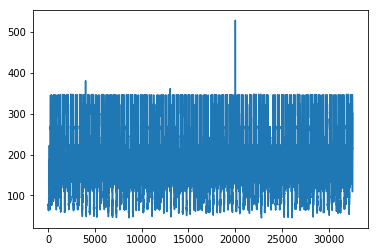

In [80]:
plt.plot(np.array(predicted).ravel())

In [84]:
train_merged['city_code'].unique()

array([647, 614, 679, 659, 526, 590, 599, 685, 461, 649, 541, 478, 703,
       576, 628, 702, 579, 596, 648, 632, 522, 615, 577, 517, 651, 683,
       713, 609, 675, 553, 593, 654, 693, 658, 515, 556, 561, 680, 620,
       638, 700, 676, 604, 456, 562, 695, 699, 602, 485, 698, 473],
      dtype=int64)

In [83]:
sub_df=pd.DataFrame(columns=['id','num_orders'])
sub_df['id']=test_merged['id'].values
sub_df['num_orders']=np.array(predicted).ravel()
sub_df.to_csv('sub_tf.csv',index=False)

In [8]:
mlp.compile('adam',metrics='rmse')

In [ ]:
mlp.fit()